# Supervised Learning - Foundations Project: ReCell

## Problem Statement

### Business Context

Buying and selling used phones and tablets used to be something that happened on a handful of online marketplace sites. But the used and refurbished device market has grown considerably over the past decade, and a new IDC (International Data Corporation) forecast predicts that the used phone market would be worth \\$52.7bn by 2023 with a compound annual growth rate (CAGR) of 13.6% from 2018 to 2023. This growth can be attributed to an uptick in demand for used phones and tablets that offer considerable savings compared with new models.

Refurbished and used devices continue to provide cost-effective alternatives to both consumers and businesses that are looking to save money when purchasing one. There are plenty of other benefits associated with the used device market. Used and refurbished devices can be sold with warranties and can also be insured with proof of purchase. Third-party vendors/platforms, such as Verizon, Amazon, etc., provide attractive offers to customers for refurbished devices. Maximizing the longevity of devices through second-hand trade also reduces their environmental impact and helps in recycling and reducing waste. The impact of the COVID-19 outbreak may further boost this segment as consumers cut back on discretionary spending and buy phones and tablets only for immediate needs.


### Objective

The rising potential of this comparatively under-the-radar market fuels the need for an ML-based solution to develop a dynamic pricing strategy for used and refurbished devices. ReCell, a startup aiming to tap the potential in this market, has hired you as a data scientist. They want you to analyze the data provided and build a linear regression model to predict the price of a used phone/tablet and identify factors that significantly influence it.


### Data Description

The data contains the different attributes of used/refurbished phones and tablets. The data was collected in the year 2021. The detailed data dictionary is given below.


- brand_name: Name of manufacturing brand
- os: OS on which the device runs
- screen_size: Size of the screen in cm
- 4g: Whether 4G is available or not
- 5g: Whether 5G is available or not
- main_camera_mp: Resolution of the rear camera in megapixels
- selfie_camera_mp: Resolution of the front camera in megapixels
- int_memory: Amount of internal memory (ROM) in GB
- ram: Amount of RAM in GB
- battery: Energy capacity of the device battery in mAh
- weight: Weight of the device in grams
- release_year: Year when the device model was released
- days_used: Number of days the used/refurbished device has been used
- normalized_new_price: Normalized price of a new device of the same model in euros
- normalized_used_price: Normalized price of the used/refurbished device in euros

## Importing necessary libraries

In [ ]:
# Installing the libraries with the specified version.
# uncomment and run the following line if Google Colab is being used
# !pip install scikit-learn==1.2.2 seaborn==0.13.1 matplotlib==3.7.1 numpy==1.25.2 pandas==1.5.3 -q --user

In [ ]:
# Installing the libraries with the specified version.
# uncomment and run the following lines if Jupyter Notebook is being used
# !pip install scikit-learn==1.2.2 seaborn==0.11.1 matplotlib==3.3.4 numpy==1.24.3 pandas==1.5.2 -q --user

**Note**: *After running the above cell, kindly restart the notebook kernel and run all cells sequentially from the start again.*

In [ ]:
# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

# split the data into train and test
from sklearn.model_selection import train_test_split

# to build linear regression_model
from sklearn.linear_model import LinearRegression

# to check model performance
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# to build linear regression_model using statsmodels
import statsmodels.api as sm

# to compute VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

## Loading the dataset

In [ ]:
# uncomment and run the following lines for Google Colab
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# loading data
data = pd.read_csv('/content/drive/MyDrive/Python Course/used_device_data.csv')

## Data Overview

### Displaying the first few rows of the dataset

In [ ]:
data.head()

,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price
0,Honor,Android,14.50,yes,no,13.0,5.0,64.0,3.0,3020.0,146.0,2020,127,4.307572,4.715100
1,Honor,Android,17.30,yes,yes,13.0,16.0,128.0,8.0,4300.0,213.0,2020,325,5.162097,5.519018
2,Honor,Android,16.69,yes,yes,13.0,8.0,128.0,8.0,4200.0,213.0,2020,162,5.111084,5.884631
3,Honor,Android,25.50,yes,yes,13.0,8.0,64.0,6.0,7250.0,480.0,2020,345,5.135387,5.630961
4,Honor,Android,15.32,yes,no,13.0,8.0,64.0,3.0,5000.0,185.0,2020,293,4.389995,4.947837


### Checking the shape of the dataset

In [ ]:
data.shape ## Complete the code to get the shape of data

(3454, 15)

The data frame has 3454 rows and 15 columns

### Checking the data types of the columns for the dataset

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3454 entries, 0 to 3453
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   brand_name             3454 non-null   object 
 1   os                     3454 non-null   object 
 2   screen_size            3454 non-null   float64
 3   4g                     3454 non-null   object 
 4   5g                     3454 non-null   object 
 5   main_camera_mp         3275 non-null   float64
 6   selfie_camera_mp       3452 non-null   float64
 7   int_memory             3450 non-null   float64
 8   ram                    3450 non-null   float64
 9   battery                3448 non-null   float64
 10  weight                 3447 non-null   float64
 11  release_year           3454 non-null   int64  
 12  days_used              3454 non-null   int64  
 13  normalized_used_price  3454 non-null   float64
 14  normalized_new_price   3454 non-null   float64
dtypes: f

In [ ]:
data.isnull().sum().sort_values(ascending = False)

,0
main_camera_mp,179
weight,7
battery,6
int_memory,4
ram,4
selfie_camera_mp,2
brand_name,0
os,0
screen_size,0
4g,0


### Statistical summary of the dataset

In [ ]:
data.describe(include='all').T  # Now you can use 'df' to perform the statistical summary ## Complete the code to print the statistical summary of the data

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
brand_name,3454,34,Others,502,NaN,NaN,NaN,NaN,NaN,NaN,NaN
os,3454,4,Android,3214,NaN,NaN,NaN,NaN,NaN,NaN,NaN
screen_size,3454.0,NaN,NaN,NaN,13.713115,3.80528,5.08,12.7,12.83,15.34,30.71
4g,3454,2,yes,2335,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5g,3454,2,no,3302,NaN,NaN,NaN,NaN,NaN,NaN,NaN
main_camera_mp,3275.0,NaN,NaN,NaN,9.460208,4.815461,0.08,5.0,8.0,13.0,48.0
selfie_camera_mp,3452.0,NaN,NaN,NaN,6.554229,6.970372,0.0,2.0,5.0,8.0,32.0
int_memory,3450.0,NaN,NaN,NaN,54.573099,84.972371,0.01,16.0,32.0,64.0,1024.0
ram,3450.0,NaN,NaN,NaN,4.036122,1.365105,0.02,4.0,4.0,4.0,12.0
battery,3448.0,NaN,NaN,NaN,3133.402697,1299.682844,500.0,2100.0,3000.0,4000.0,9720.0


Observations:
- There are 34 unique manufacturing brands, four distinct operating systems, and 4gor 5gvalues of either yes or no for various phone models. 'Android' is the most common operating system, with 3,214 mobile devices using it.
- There are 4 operating systems.
- Only 152 phones support 5G, compared to 2335 that support 4G, 967 of the phones are not 4G or 5G.
- There is a maximum screen size of 30cm which is obviously a tablet and a minimum screen size of 5cm which suggeststhat there could be low-end cell phones or "no smartphones".
- The average and median values are close in the main_camera_mpvariable.

In [ ]:
df.describe()

,screen_size,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price
count,3454.000000,3275.000000,3452.000000,3450.000000,3450.000000,3448.000000,3447.000000,3454.000000,3454.000000,3454.000000,3454.000000
mean,13.713115,9.460208,6.554229,54.573099,4.036122,3133.402697,182.751871,2015.965258,674.869716,4.364712,5.233107
std,3.805280,4.815461,6.970372,84.972371,1.365105,1299.682844,88.413228,2.298455,248.580166,0.588914,0.683637
min,5.080000,0.080000,0.000000,0.010000,0.020000,500.000000,69.000000,2013.000000,91.000000,1.536867,2.901422
25%,12.700000,5.000000,2.000000,16.000000,4.000000,2100.000000,142.000000,2014.000000,533.500000,4.033931,4.790342
50%,12.830000,8.000000,5.000000,32.000000,4.000000,3000.000000,160.000000,2015.500000,690.500000,4.405133,5.245892
75%,15.340000,13.000000,8.000000,64.000000,4.000000,4000.000000,185.000000,2018.000000,868.750000,4.755700,5.673718
max,30.710000,48.000000,32.000000,1024.000000,12.000000,9720.000000,855.000000,2020.000000,1094.000000,6.619433,7.847841


### Checking for Missing values

In [ ]:
df.isnull().sum().sort_values(ascending = False) ## Complete the code to check for missing data in the dataset

,0
main_camera_mp,179
weight,7
battery,6
int_memory,4
ram,4
selfie_camera_mp,2
brand_name,0
os,0
screen_size,0
4g,0


Missing values observations :main_camera_mp, selfie_camera_mp, int_memory, ram, battery, and weightcontain missing values, themost significant being main_camera_mpwith 179 missing values.

In [ ]:
 # Looking at main_camera_mp column missing values
 mainCamera_miss = df[df["main_camera_mp"].isnull()]
 mainCamera_miss.head()

,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price
59,Infinix,Android,17.32,yes,no,NaN,8.0,32.0,2.0,6000.0,209.0,2020,245,4.282068,4.597642
60,Infinix,Android,15.39,yes,no,NaN,8.0,64.0,4.0,5000.0,185.0,2020,173,4.363608,4.711780
61,Infinix,Android,15.39,yes,no,NaN,8.0,32.0,2.0,5000.0,185.0,2020,256,4.181439,4.505460
62,Infinix,Android,15.39,yes,no,NaN,16.0,32.0,3.0,4000.0,178.0,2019,316,4.555244,4.602166
63,Infinix,Android,15.29,yes,no,NaN,16.0,32.0,2.0,4000.0,165.0,2019,468,4.416670,4.871297


In [ ]:
mainCamera_miss["os"].value_counts()

,count
os,
Android,179


In [ ]:
mainCamera_miss["brand_name"].value_counts()

,count
brand_name,
Realme,36
Xiaomi,23
Oppo,20
Motorola,18
OnePlus,17
Meizu,15
Vivo,14
Infinix,10
Sony,7


In [ ]:
# Looking for the number of Operatitng Systems
df['os'].value_counts()

,count
os,
Android,3214
Others,137
Windows,67
iOS,36


### Checking for Duplicate values

In [ ]:
duplicate_rows = df.groupby(df.columns.tolist(),as_index=False).size()
duplicate_rows = duplicate_rows[duplicate_rows['size'] > 1]
print(duplicate_rows)

Empty DataFrame
Columns: [brand_name, os, screen_size, 4g, 5g, main_camera_mp, selfie_camera_mp, int_memory, ram, battery, weight, release_year, days_used, normalized_used_price, normalized_new_price, size]
Index: []


In [ ]:
 #Checking for duplicate values
 df.duplicated().sum()

0

There are no duplicate values in the data.

In [ ]:
# creating a copy of the data so that original data remains unchanged
df = data.copy()

## Exploratory Data Analysis

### Univariate Analysis

In [ ]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(15, 10), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (15,10))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a triangle will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [ ]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 2, 6))
    else:
        plt.figure(figsize=(n + 2, 6))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        order=data[feature].value_counts().index[:n],
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

**`normalized_used_price`**

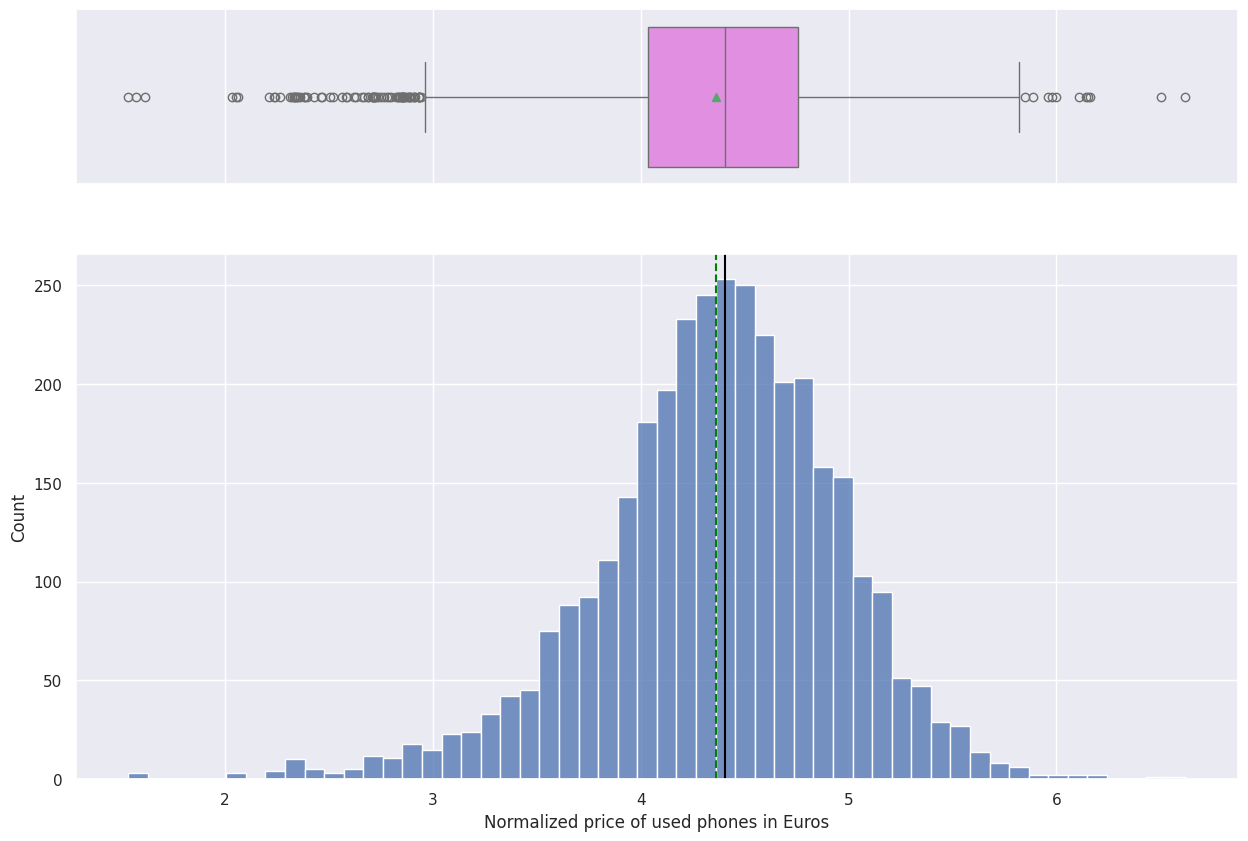

In [ ]:
histogram_boxplot(df, "normalized_used_price")
plt.xlabel('Normalized price of used phones in Euros');

Observation for normalized_used_price:

The normalized_used_priceis close to normally distributed.

The boxplot shows that there are outliers.

**`normalized_new_price`**

Text(0.5, 0, 'Normalized price of new phones in Euros')

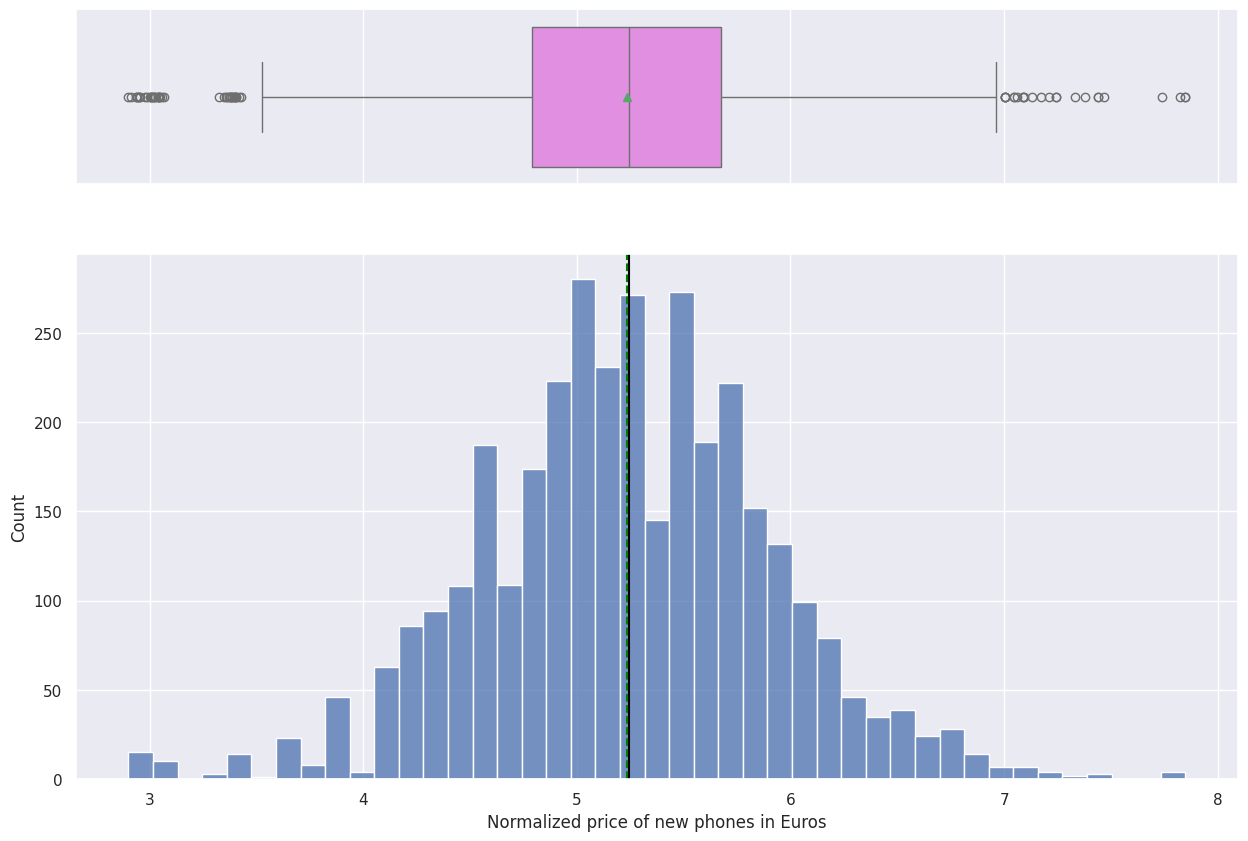

In [ ]:
histogram_boxplot(df,'normalized_new_price')
plt.xlabel('Normalized price of new phones in Euros')
 ## Complete the code to create histogram_boxplot for 'normalized_new_price'

Observation for normalized_new_price:

The normalized_new_priceis close to normally distributed.

**`screen_size`**

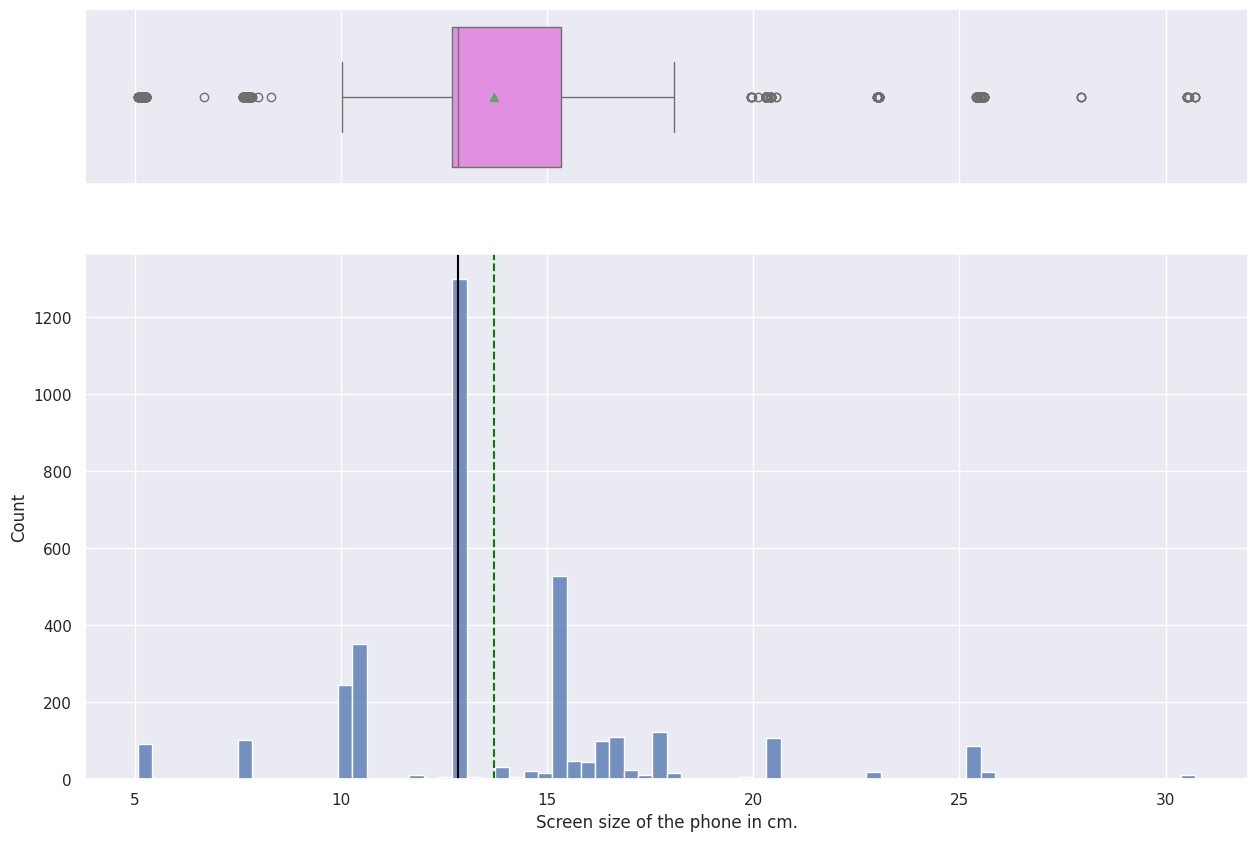

In [ ]:
histogram_boxplot(df,'screen_size')  ## Complete the code to create histogram_boxplot for 'screen_size'
plt.xlabel('Screen size of the phone in cm.');

Observation

Normally distributed, if we reduced the number of bins, the normal distribution could be better visualized.

There are outliers above 20cm which suggests the Tablets in the data set, there are also outliers as low as 5cm which is interesting.

**`main_camera_mp`**

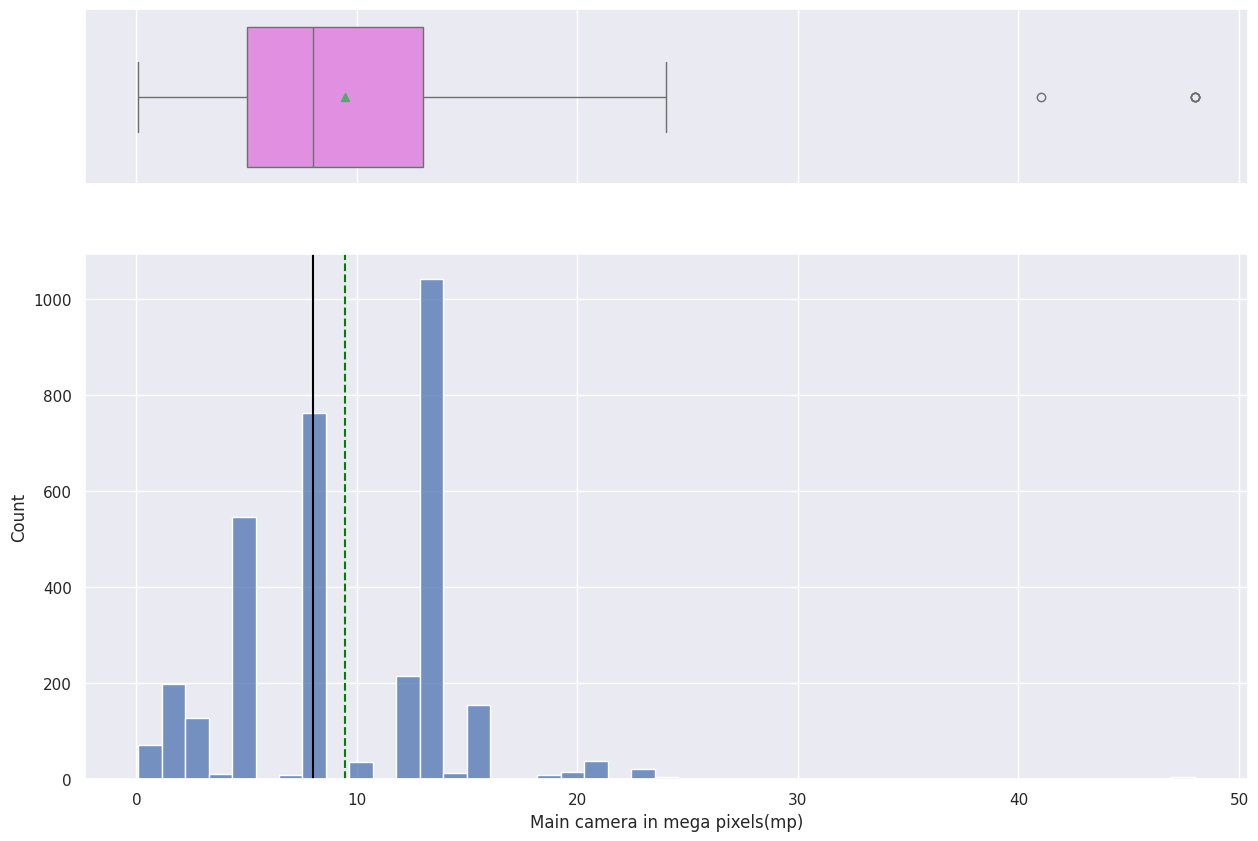

In [ ]:
histogram_boxplot(df,'main_camera_mp')  ## Complete the code to create histogram_boxplot for 'main_camera_mp'
plt.xlabel('Main camera in mega pixels(mp)');

**`selfie_camera_mp`**

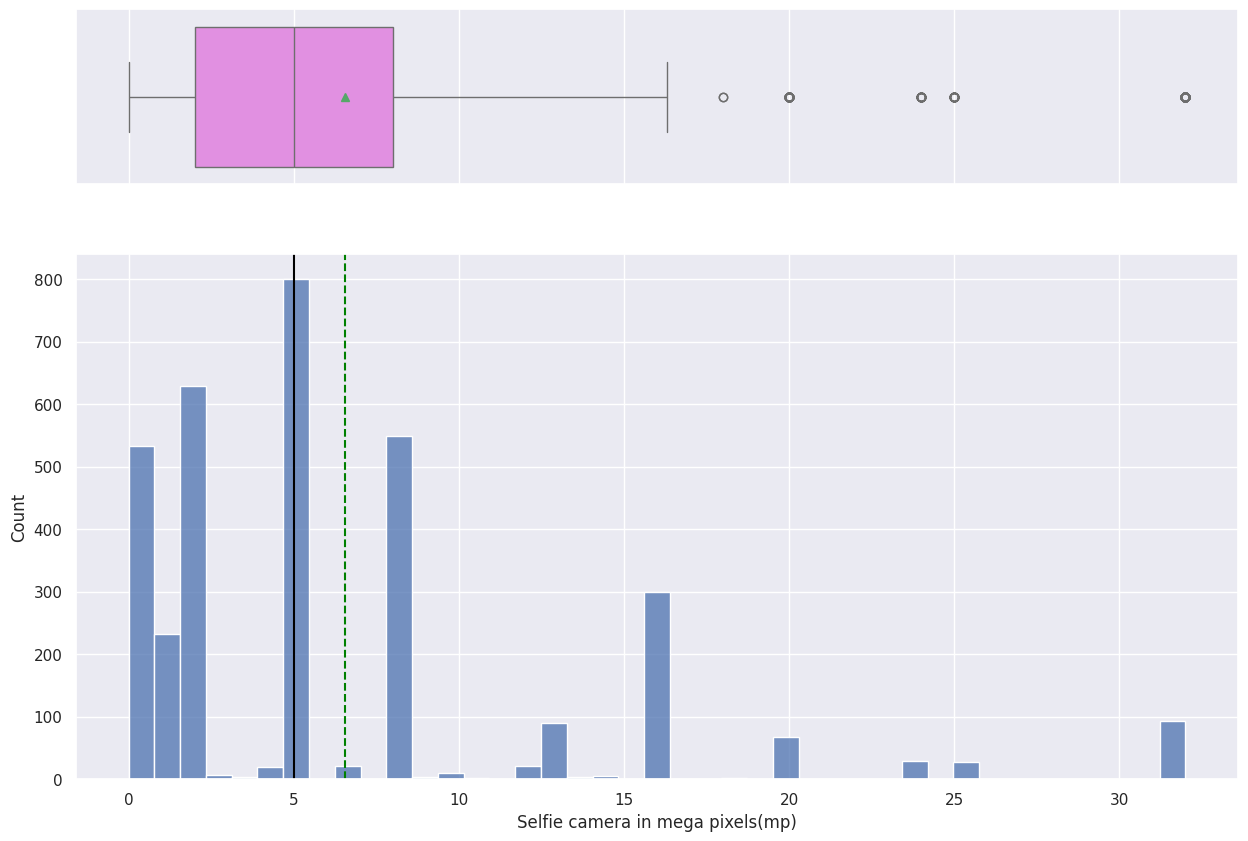

In [ ]:
histogram_boxplot(df,'selfie_camera_mp')  ## Complete the code to create histogram_boxplot for 'selfie_camera_mp'
plt.xlabel('Selfie camera in mega pixels(mp)');

Observation:

-The selfie_camera_mpshows a right skewed distribution, with outliers above 20mp which is rare for selfie camera

**`int_memory`**

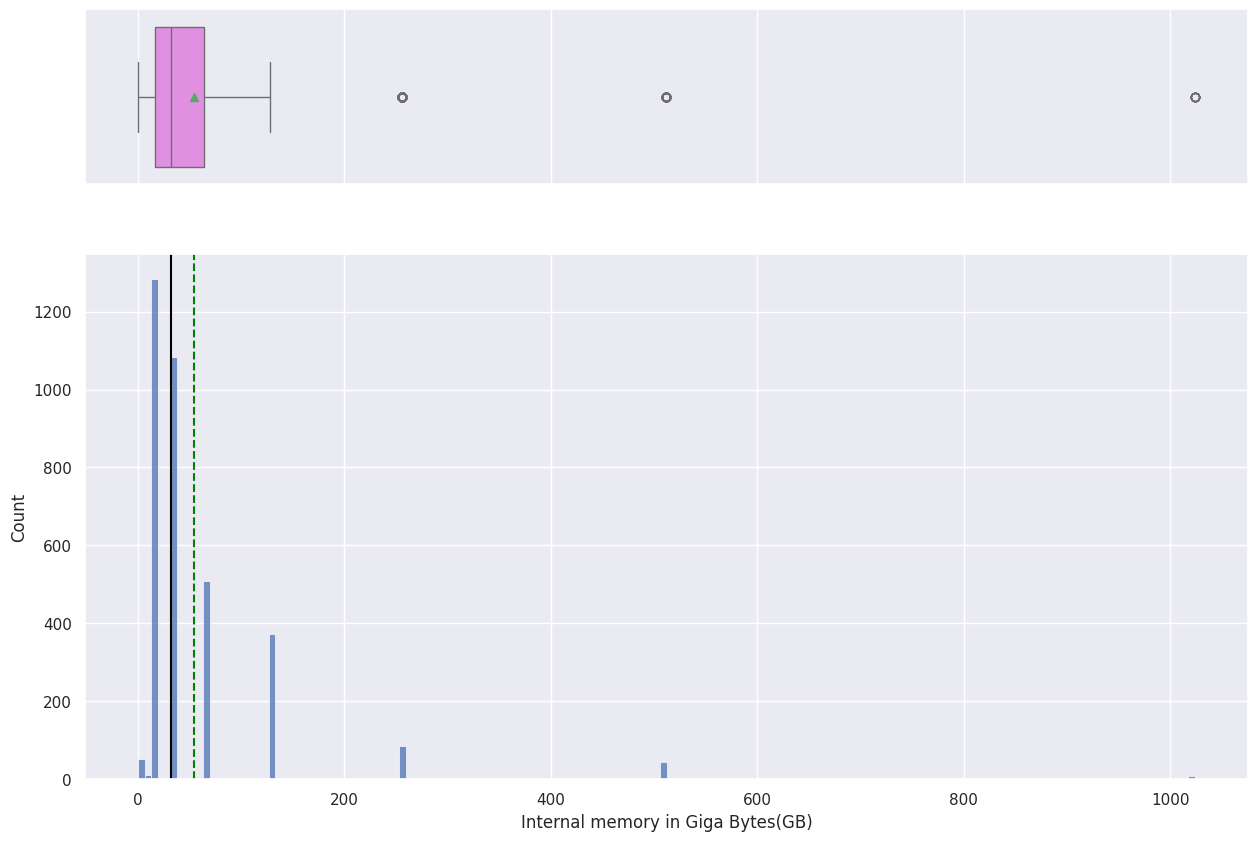

In [ ]:
histogram_boxplot(df,'int_memory')
plt.xlabel('Internal memory in Giga Bytes(GB)');  ## Complete the code to create histogram_boxplot for 'int_memory'

**`ram`**

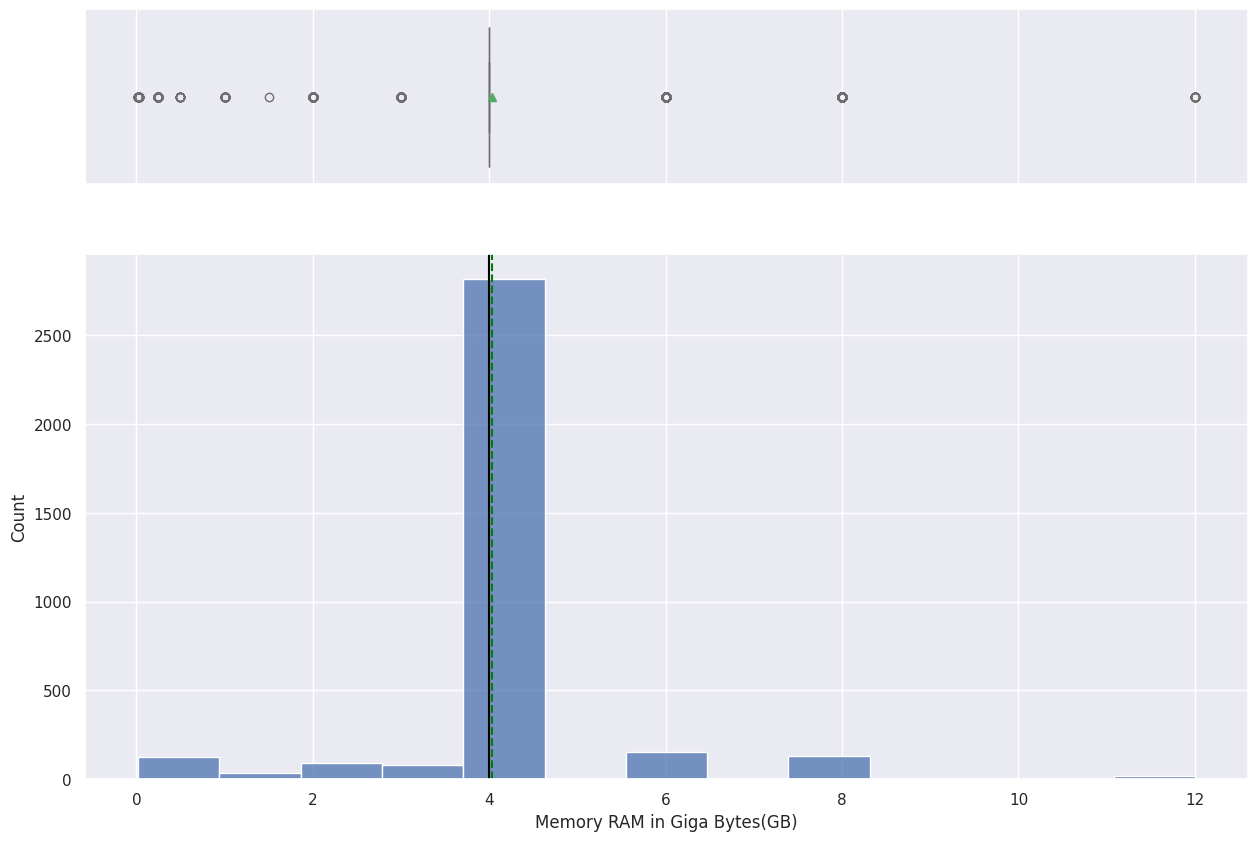

In [ ]:
histogram_boxplot(df,'ram')  ## Complete the code to create histogram_boxplot for 'ram'
plt.xlabel('Memory RAM in Giga Bytes(GB)');

**`weight`**

Text(0.5, 0, 'Weight in grams')

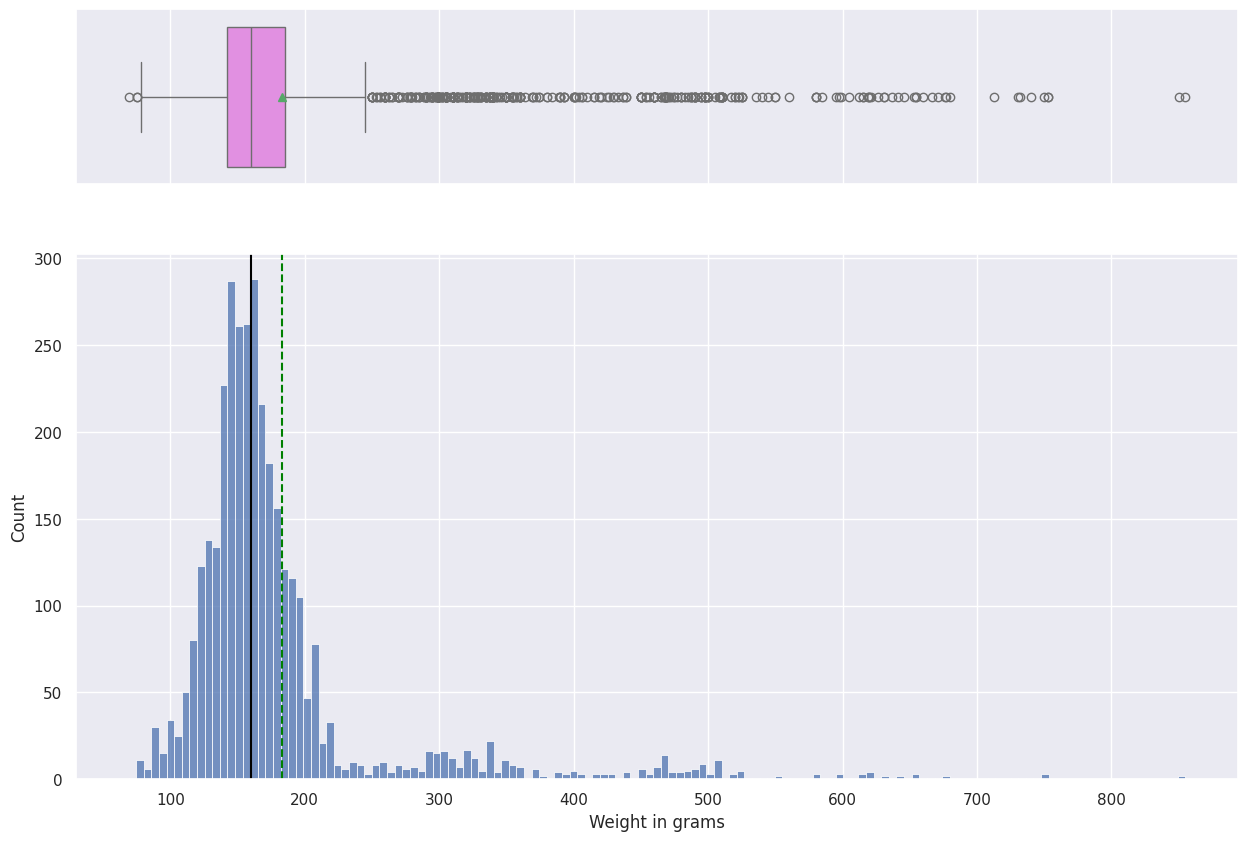

In [ ]:
histogram_boxplot(df,'weight')  ## Complete the code to create histogram_boxplot for 'weight'
plt.xlabel('Weight in grams')

Observation for weight:

-The weight variable is highly skewed to the right

**`battery`**

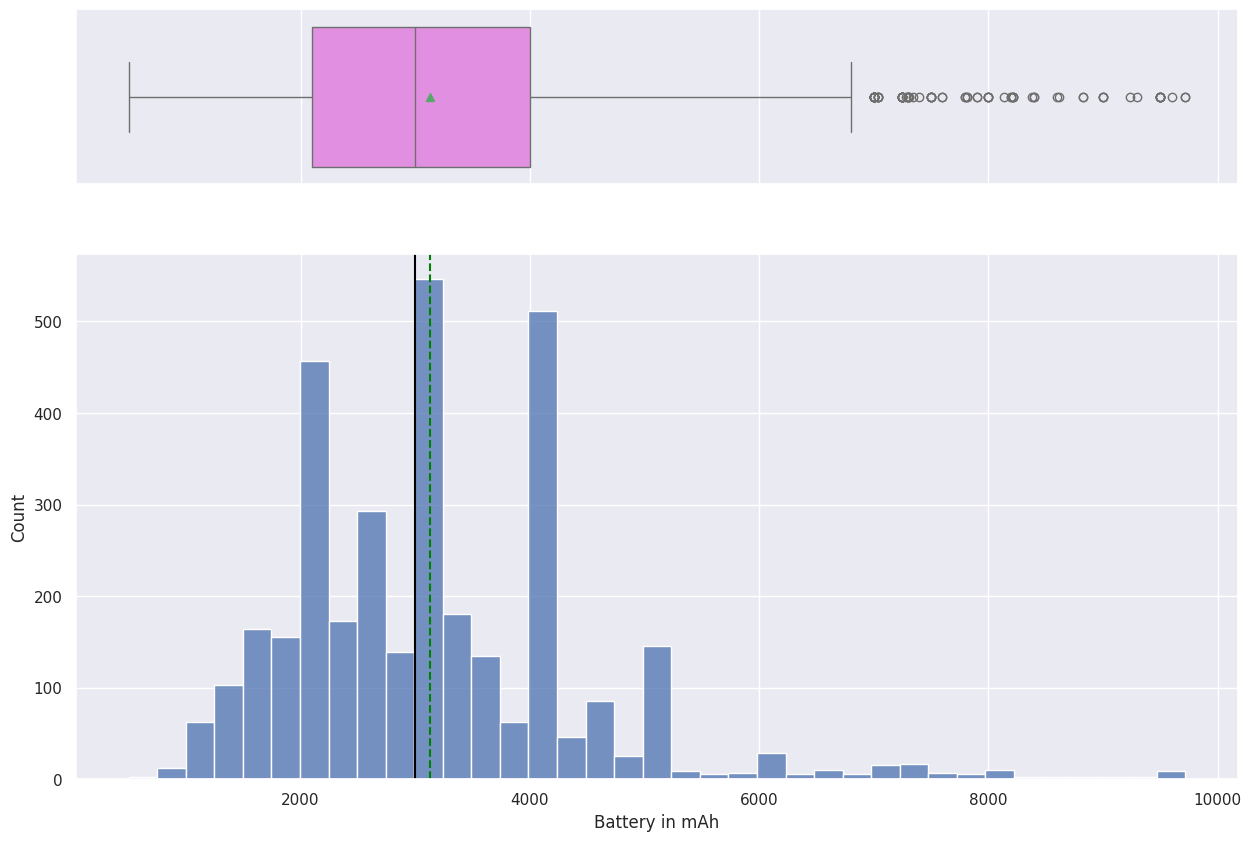

In [ ]:
histogram_boxplot(df,'battery')
plt.xlabel('Battery in mAh');   ## Complete the code to create histogram_boxplot for 'battery'

**`days_used`**

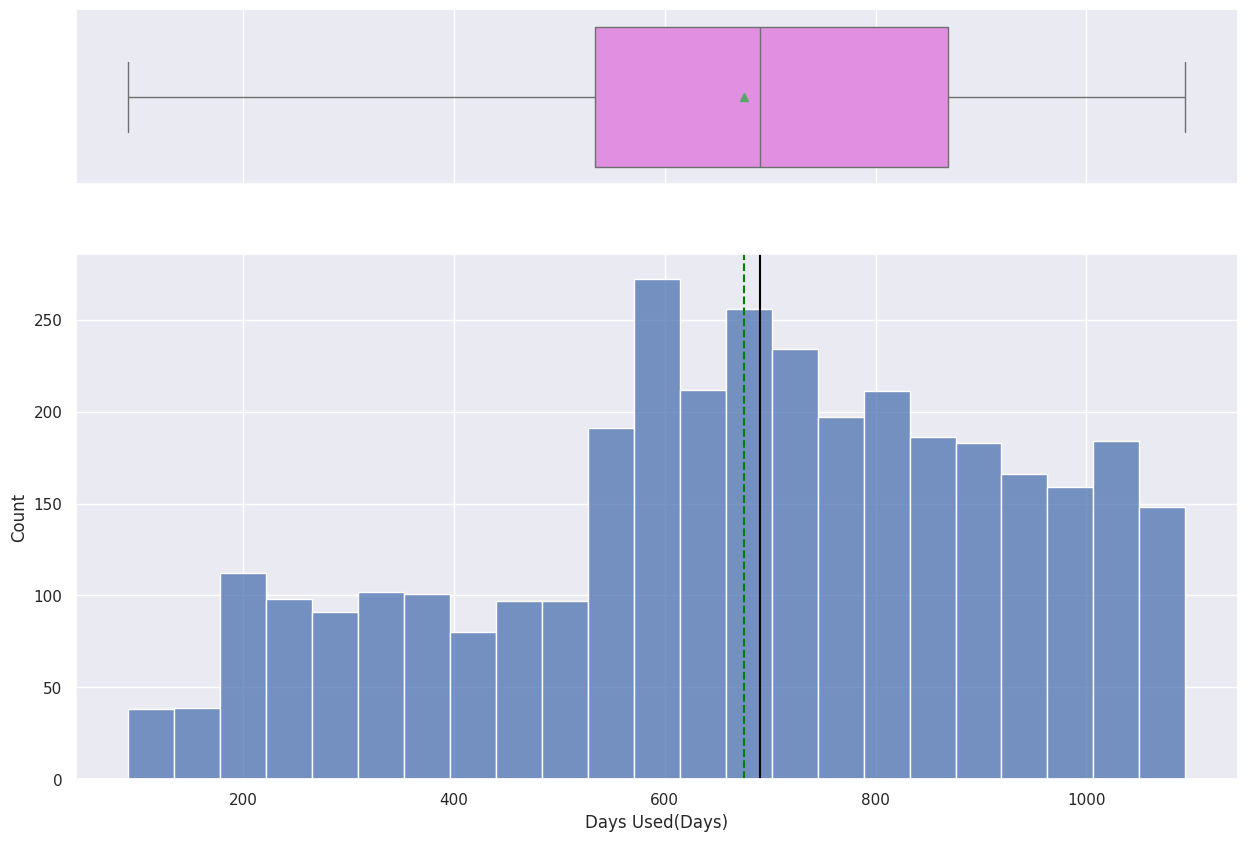

In [ ]:
histogram_boxplot(df,'days_used')
plt.xlabel('Days Used(Days)');   ## Complete the code to create histogram_boxplot for 'days_used'

**`brand_name`**

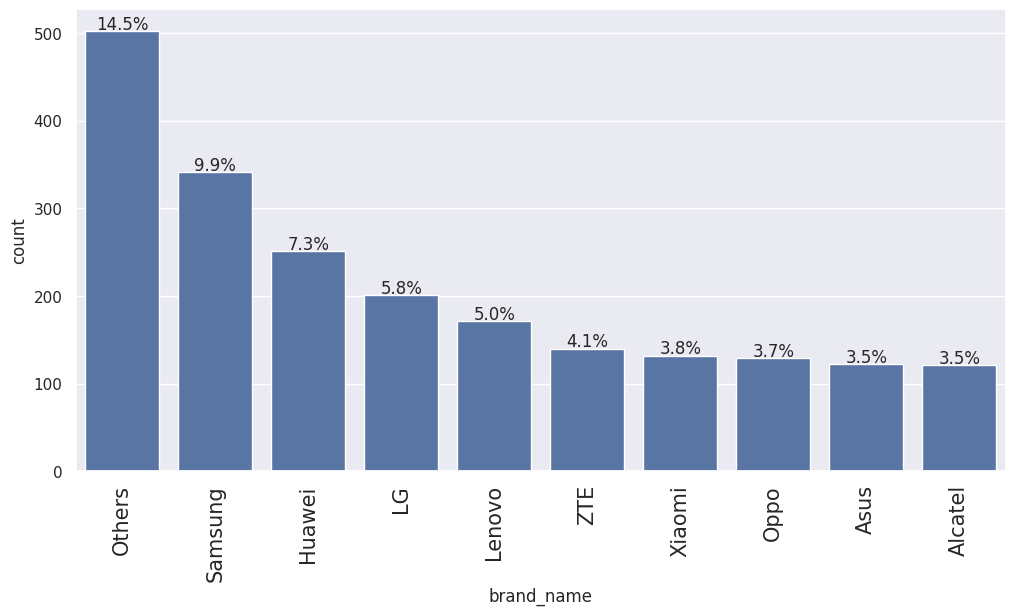

In [ ]:
labeled_barplot(df, "brand_name", perc=True, n=10)

**`os`**

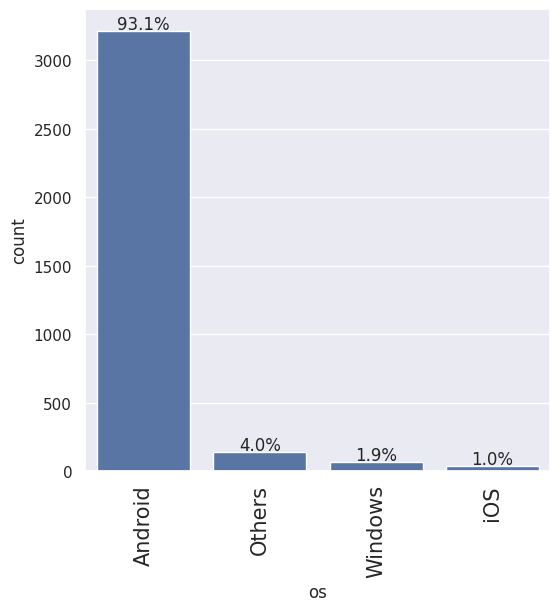

In [ ]:
# Q2. What percentage of the used device market is dominated by Android devices?
labeled_barplot(df, 'os', perc=True)


Observation:

- Android smartphones are the most often reconditioned in the data, accounting for 93.1% of the Refurbished market.

- iOS devices have the lowest percentage of reconditioned smartphones on the market, at 1.0

**Brand Name**

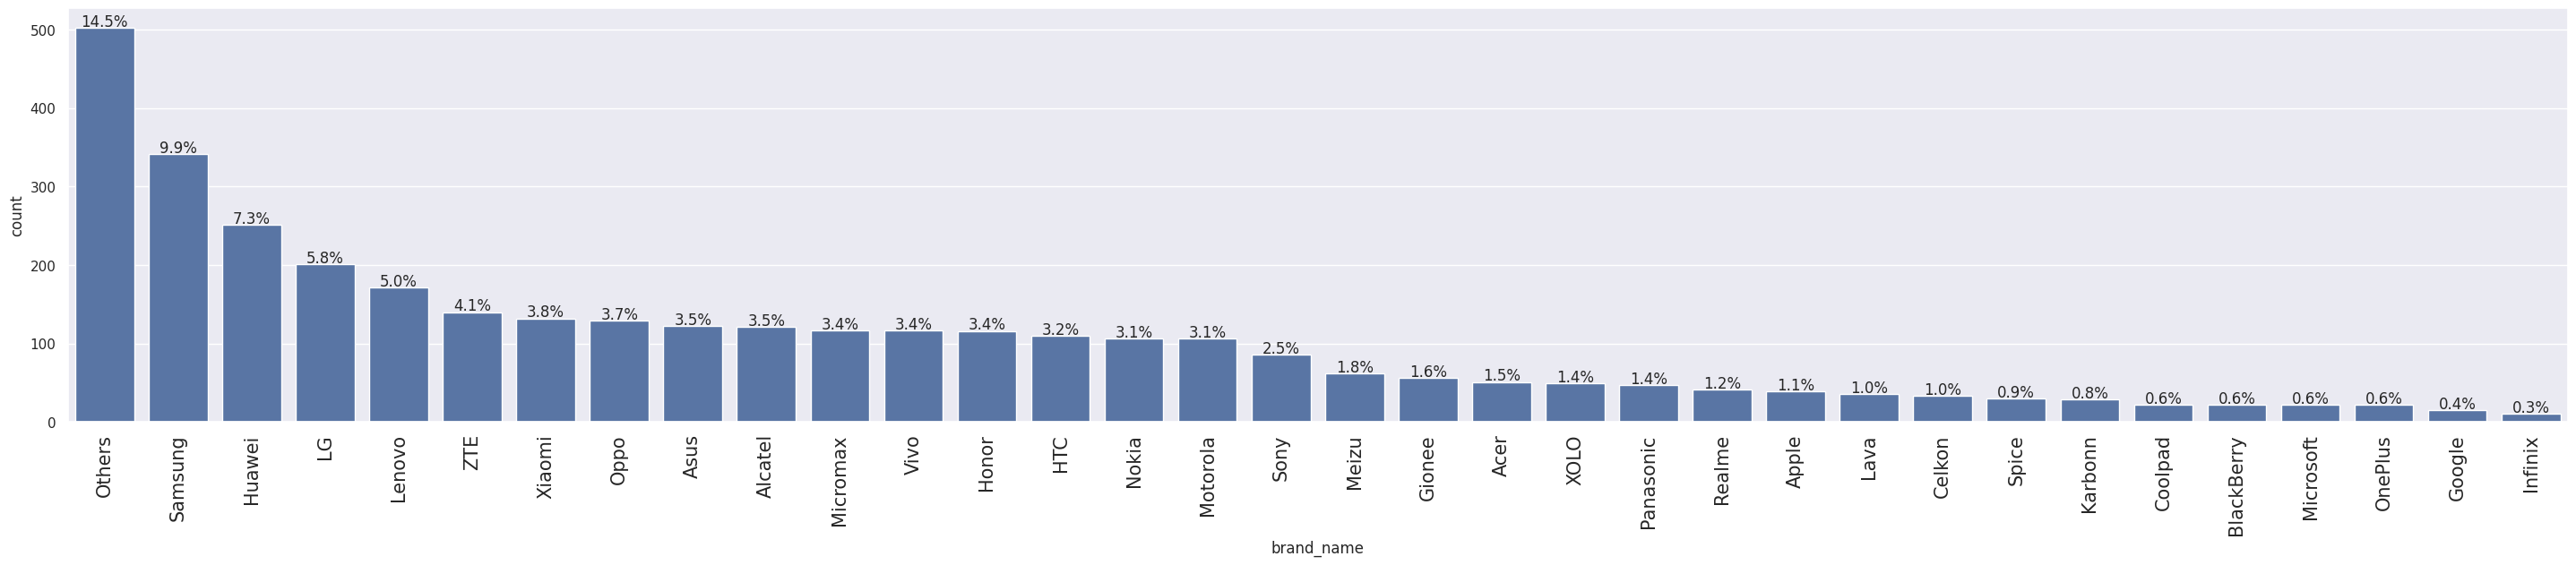

In [ ]:
labeled_barplot(df, "brand_name", perc=True)

**4g**

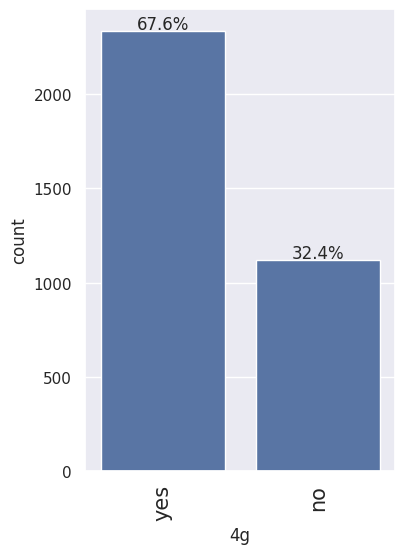

In [ ]:
labeled_barplot(df,'4g', perc=True) ## Complete the code to create labeled_barplot for '4g'

**`5g`**

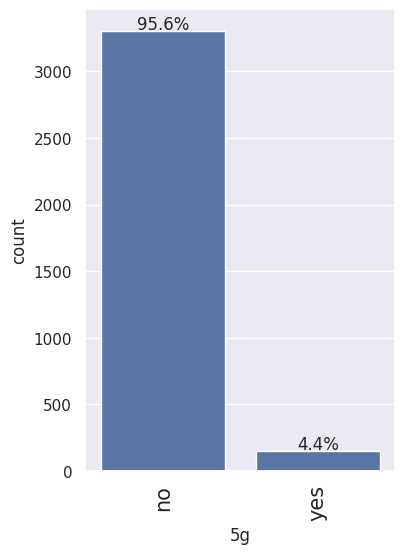

In [ ]:
labeled_barplot(df,'5g', perc=True) ## Complete the code to create labeled_barplot for '5g'

**`release_year`**

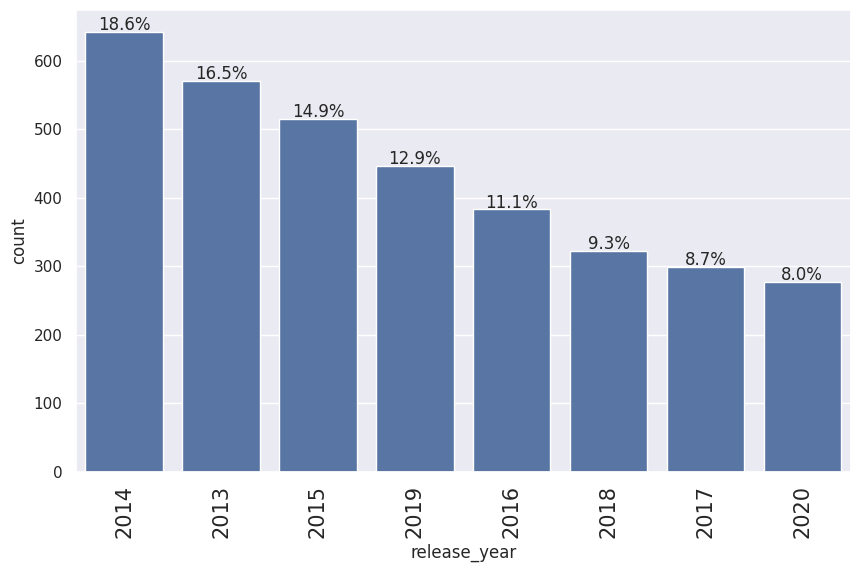

In [ ]:
labeled_barplot(df, "release_year", perc=True,) ## Complete the code to create labeled_barplot for 'release_year'

### Bivariate Analysis

**Correlation Check**

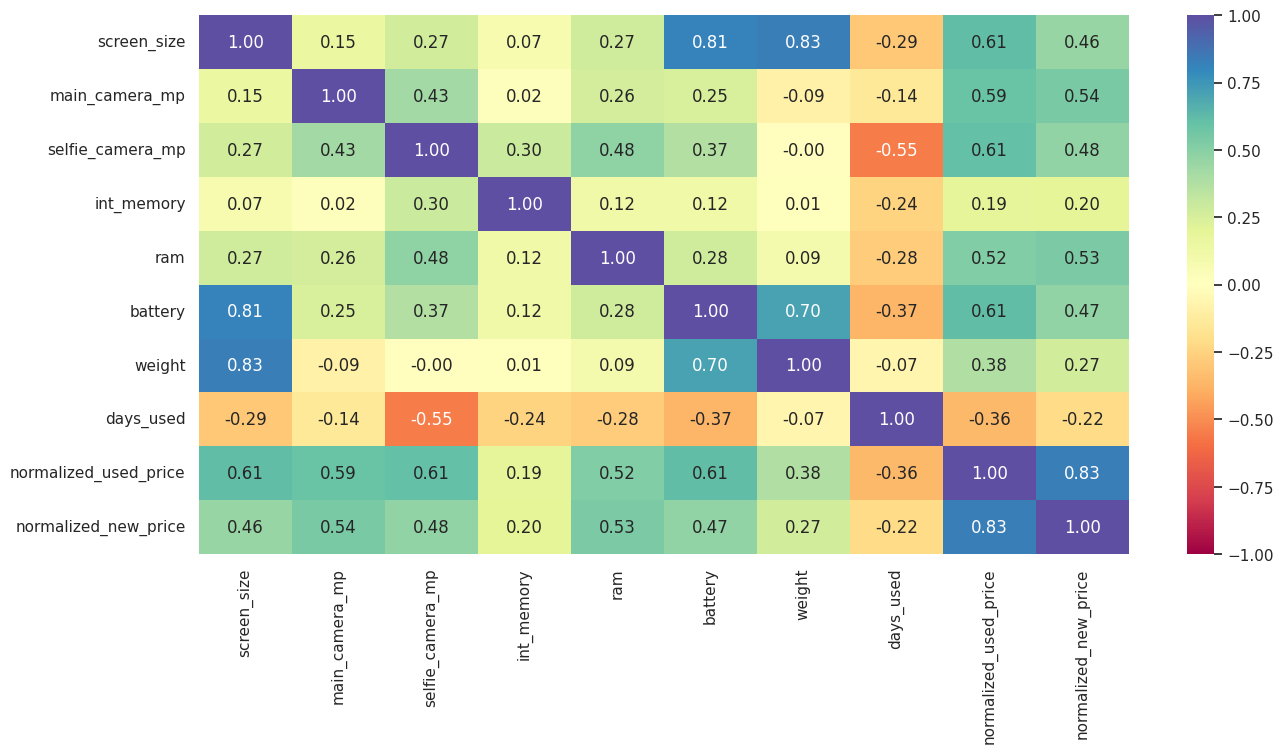

In [ ]:
cols_list = df.select_dtypes(include=np.number).columns.tolist()
# dropping release_year as it is a temporal variable
cols_list.remove("release_year")

plt.figure(figsize=(15, 7))
sns.heatmap(
    df[cols_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)
plt.show()

Observations of Heatmap:

-battery and screen_sizehave a strong correlation, also battery and weight have a strong correlation,this makes sense as devices with larger screens tend to have larger batteries and thus considerably more weight.


**The amount of RAM is important for the smooth functioning of a device. Let's see how the amount of RAM varies across brands.**

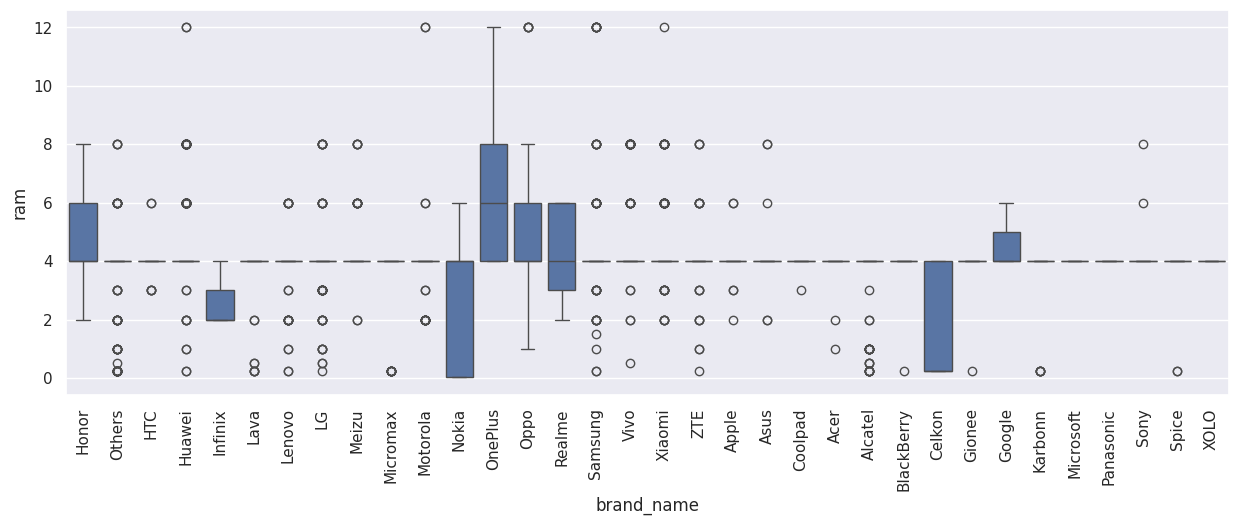

In [ ]:
# Q3 The amount of RAM is important for the smooth functioning of a device. How does the amount of RAM vary with the brand?
plt.figure(figsize=(15, 5))
sns.boxplot(data=df, x="brand_name", y="ram")
plt.xticks(rotation=90)
plt.show()

**People who travel frequently require devices with large batteries to run through the day. But large battery often increases weight, making it feel uncomfortable in the hands. Let's create a new dataframe of only those devices which offer a large battery and analyze.**

In [ ]:
# Q4. A large battery often increases a device's weight, making it feel uncomfortable in the hands.#
#How does the weight vary for phones and tablets offering large batteries (more than 4500 mAh)?
#Create a dataframe for devices with battery capacity larger than 4500mAh
dfLarge_bat = df[df.battery > 4500] # Print the shape of the datasetprint('There are', dfLarge_bat.shape[0], 'refurbished phones with batteries larger than4500mAh.')

There are 341 refurbished phones with batteries larger than 4500mAh.

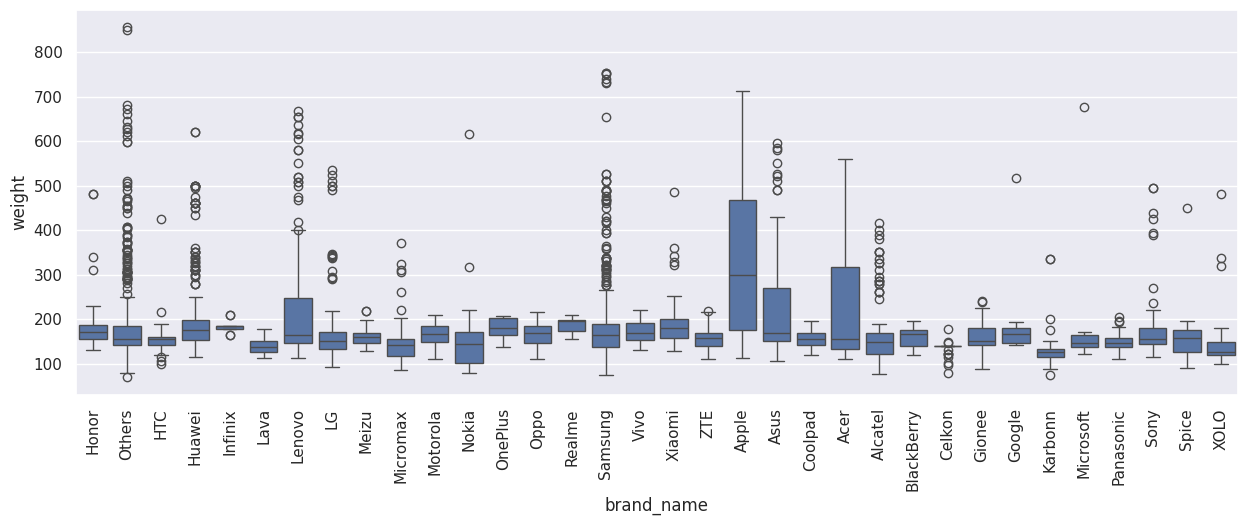

In [ ]:
plt.figure(figsize=(15, 5))
sns.boxplot(data=df, x="brand_name", y="weight") ## Complete the code to create a boxplot for 'brand_name' and 'weight'
plt.xticks(rotation=90)
plt.show()

**People who buy phones and tablets primarily for entertainment purposes prefer a large screen as they offer a better viewing experience. Let's create a new dataframe of only those devices which are suitable for such people and analyze.**

In [ ]:
df_large_screen = df[df.screen_size > 6 * 2.54]
df_large_screen.shape

(1099, 15)

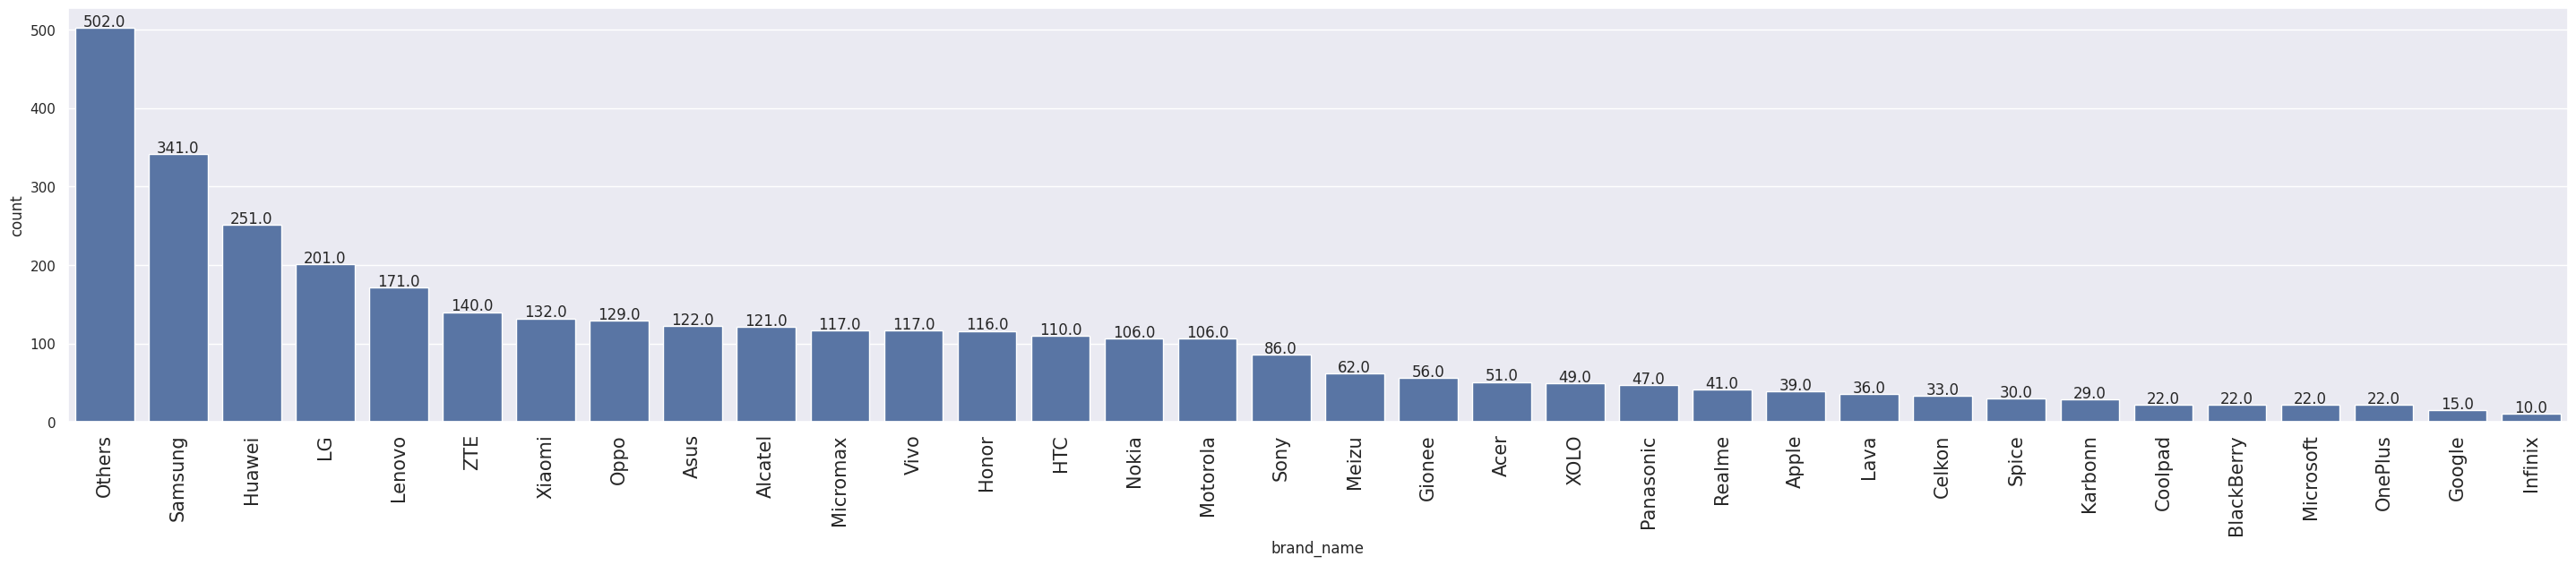

In [ ]:
labeled_barplot(df,'brand_name') ## Complete the code to create labeled_barplot for 'brand_name' in large screen dataframe

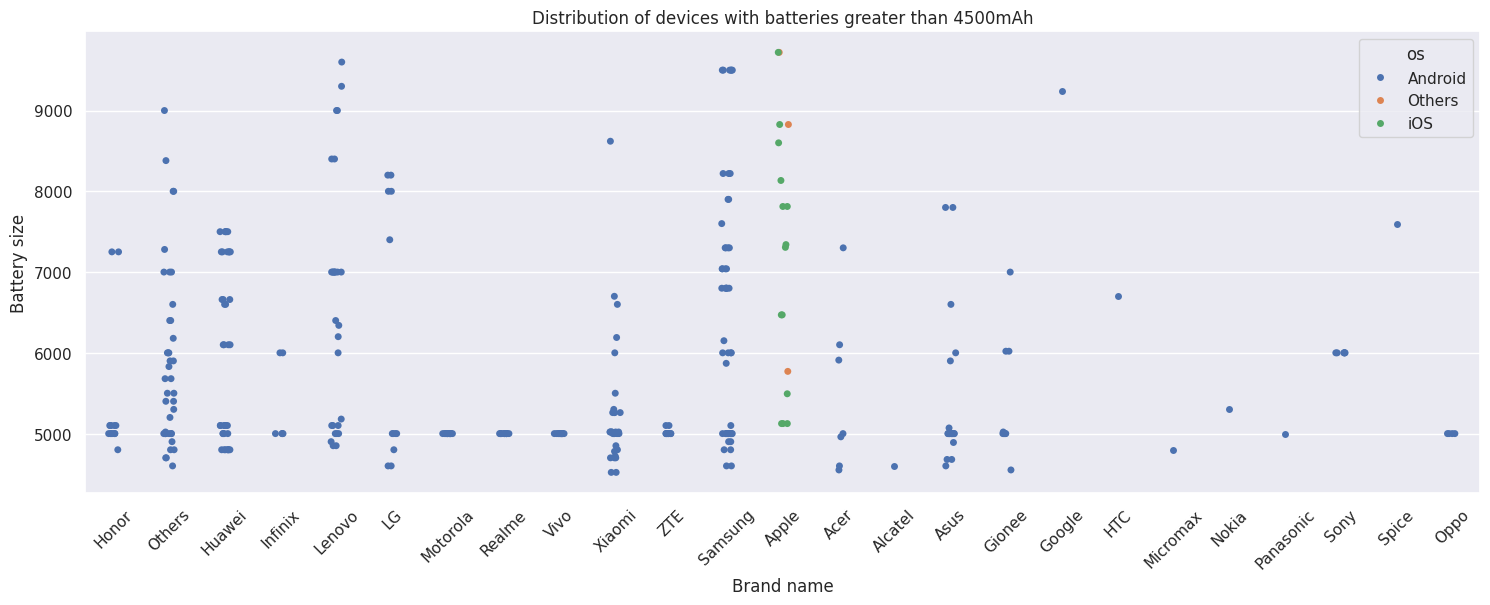

In [ ]:
# Comparing the Brand name vs battery size when larger than 4500mAh
plt.figure(figsize=(18,6))
plt.title('Distribution of devices with batteries greater than 4500mAh')
sns.stripplot(data=dfLarge_bat,x='brand_name',y='battery', hue='os')
plt.xlabel('Brand name')
plt.ylabel('Battery size')
plt.xticks(rotation=45);

**Everyone likes a good camera to capture their favorite moments with loved ones. Some customers specifically look for good front cameras to click cool selfies. Let's create a new dataframe of only those devices which are suitable for this customer segment and analyze.**

In [ ]:
df_selfie_camera = df[df.selfie_camera_mp > 8]
df_selfie_camera.shape

(655, 15)

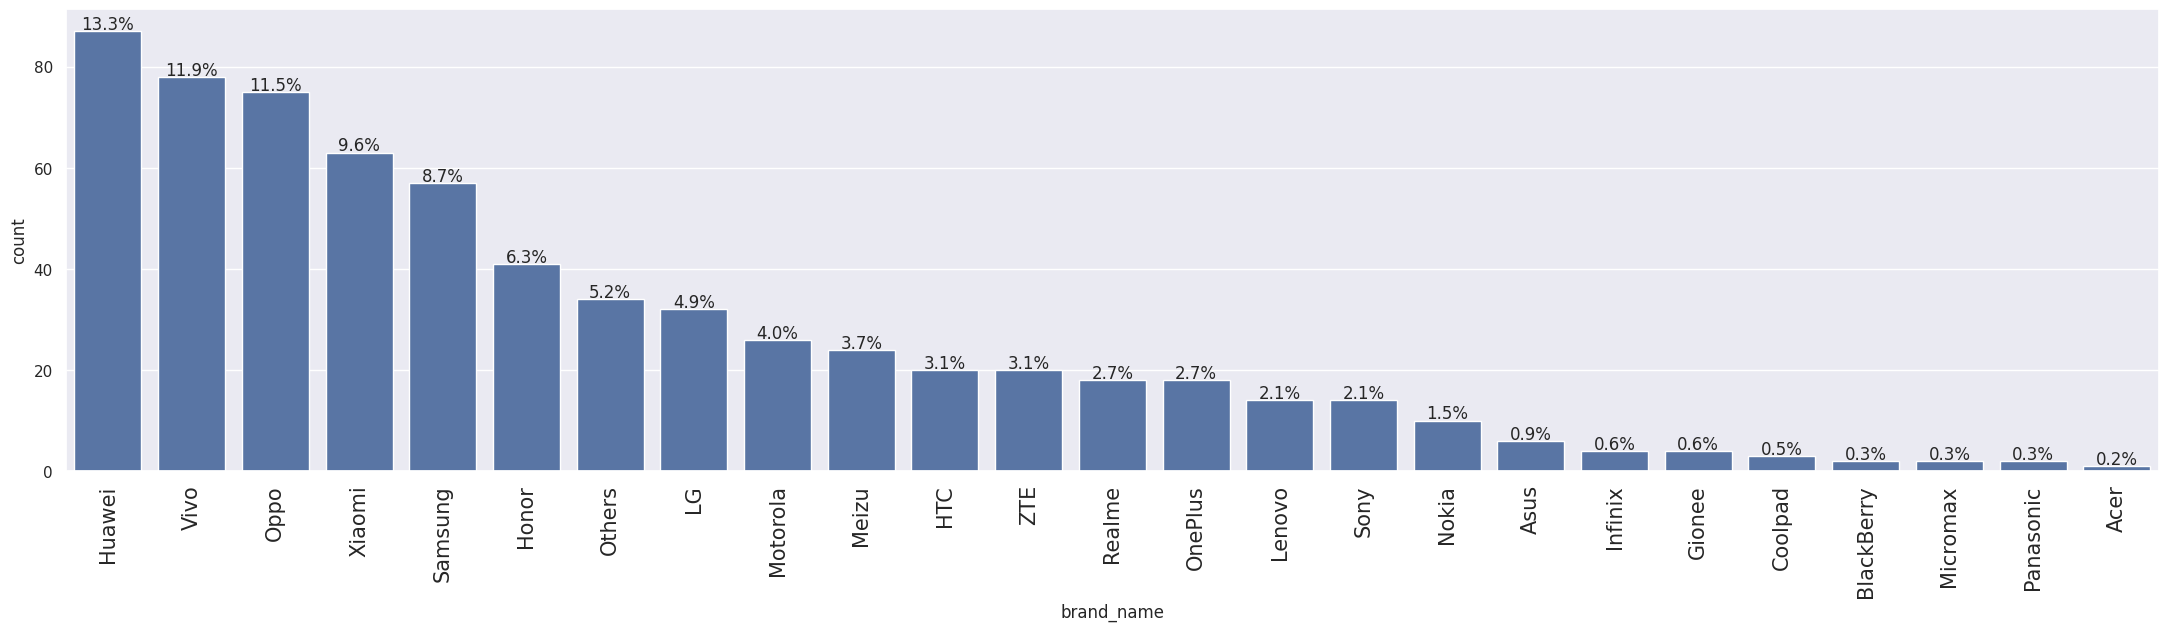

In [ ]:
labeled_barplot(df_selfie_camera,'brand_name', perc=True) ## Complete the code to create labeled_barplot for 'brand_name' in selfie camera dataframe

**Let's do a similar analysis for rear cameras.**

- Rear cameras generally have a better resolution than front cameras, so we set the threshold higher for them at 16MP.

In [ ]:
df_main_camera = df[df.main_camera_mp > 16]
df_main_camera.shape

(94, 15)

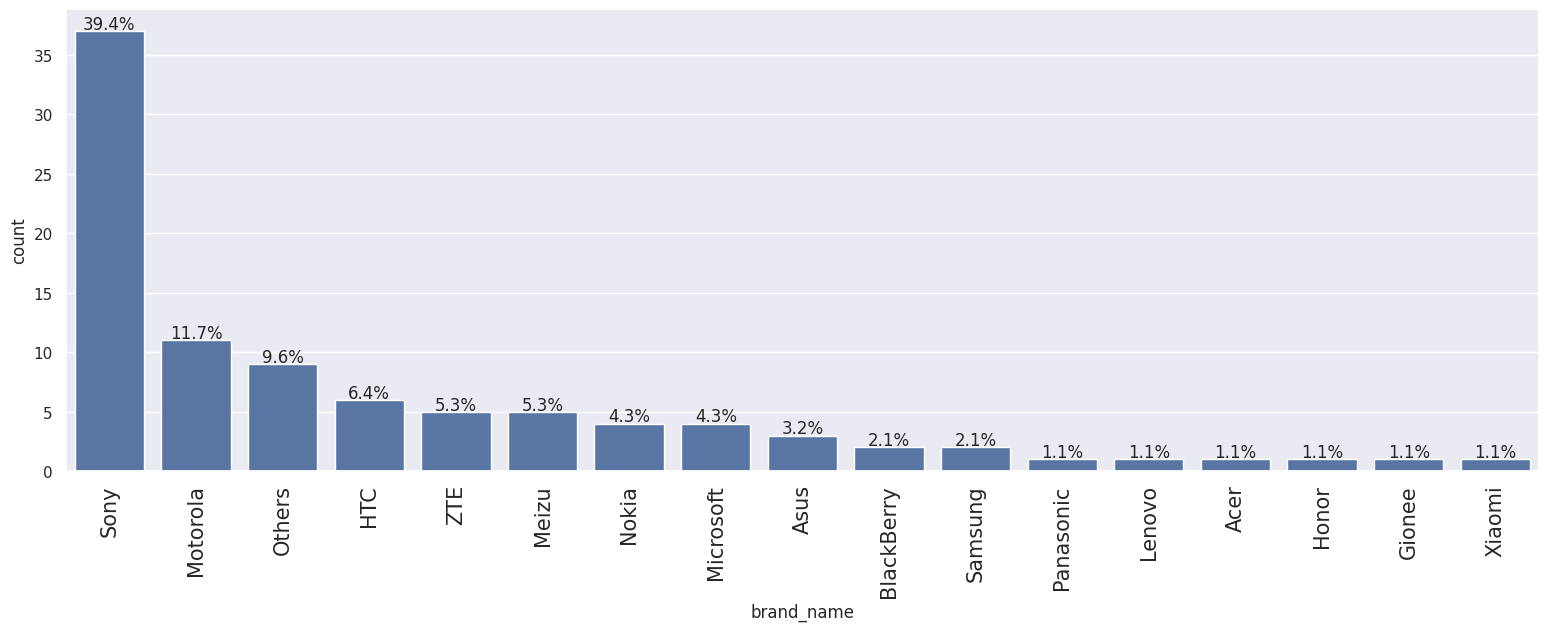

In [ ]:
labeled_barplot(df_main_camera,'brand_name', perc=True) ## Complete the code to create labeled_barplot for 'brand_name' in high main camera dataframe

**Let's see how the price of used devices varies across the years.**

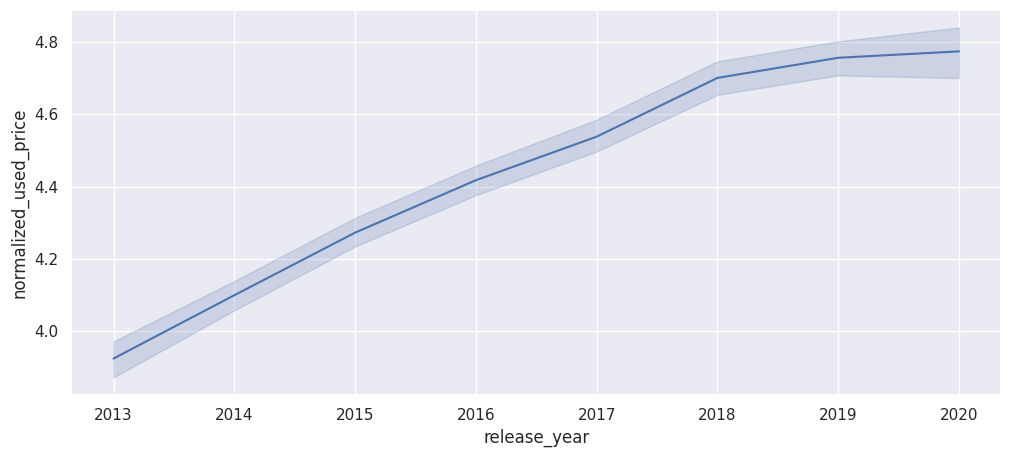

In [ ]:
plt.figure(figsize=(12, 5))
sns.lineplot(df,x='release_year',y='normalized_used_price') ## Complete the code to create a lineplot for release year and used price
plt.show()

Observations

- As release year increases as the used price increases.

- The newer the phone the more expensive the used phone will be.

**Let's check how the prices vary for used phones and tablets offering 4G and 5G networks.**

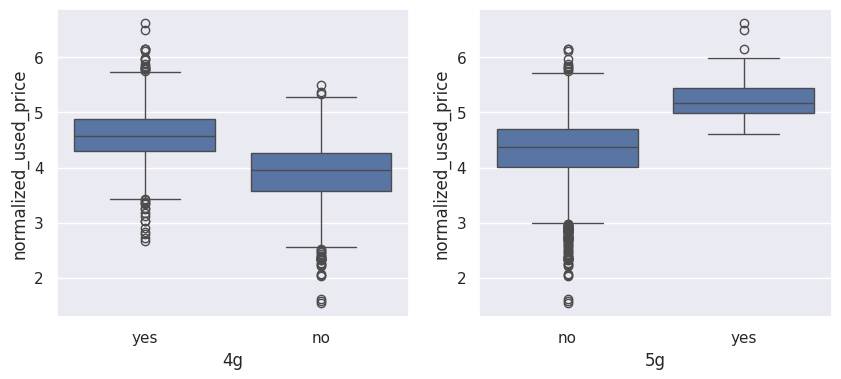

In [ ]:
plt.figure(figsize=(10, 4))

plt.subplot(121)
sns.boxplot(data=df, x="4g", y="normalized_used_price")

plt.subplot(122)
sns.boxplot(data=df, x="5g", y="normalized_used_price")

plt.show()

## Data Preprocessing

### Missing Value Imputation

- We will impute the missing values in the data by the column medians grouped by `release_year` and `brand_name`.

In [ ]:
# let's create a copy of the data
df1 = df.copy()

In [ ]:
# checking for missing values
df1.isna().sum().sort_values(ascending=False) ## Complete the code to check missing values in all the columns

,0
main_camera_mp,179
weight,7
battery,6
int_memory,4
ram,4
selfie_camera_mp,2
brand_name,0
os,0
screen_size,0
4g,0


Let's fix the missing values in the data.
We will impute the missing values with the median.

In [ ]:
df1 = df1.fillna(df1.median(numeric_only=True)) #fix missing data

In [ ]:
df1.isna().sum().sort_values(ascending=False)

,0
brand_name,0
os,0
screen_size,0
4g,0
5g,0
main_camera_mp,0
selfie_camera_mp,0
int_memory,0
ram,0
battery,0


All the missing values have been treated.

In [ ]:
# checking for duplicates
df1.duplicated().any() ## Complete the code to check missing values in all the columns

False

In [ ]:
cols_impute = [
    "main_camera_mp",
    "selfie_camera_mp",
    "int_memory",
    "ram",
    "battery",
    "weight",
]

for col in cols_impute:
    df1[col] = df1[col].fillna(
        value=df1.groupby(['release_year','brand_name'])[col].transform("median")
    )   ## Complete the code to impute missing values in cols_impute with median by grouping the data on release year and brand name

# checking for missing values
df1.isnull().sum() ## Complete the code to check missing values after imputing the above columns

,0
brand_name,0
os,0
screen_size,0
4g,0
5g,0
main_camera_mp,179
selfie_camera_mp,2
int_memory,0
ram,0
battery,6


- We will impute the remaining missing values in the data by the column medians grouped by `brand_name`.

In [ ]:
cols_impute = [
    "main_camera_mp",
    "selfie_camera_mp",
    "battery",
    "weight",
]

for col in cols_impute:
    df1[col] = df1[col].fillna(
        value=df1.groupby('brand_name')[col].transform("median")
    ) ## Complete the code to impute the missing values in cols_impute with median by grouping the data on brand name

# checking for missing values
df1.isnull().sum() ## Complete the code to check missing values after imputing the above columns

,0
brand_name,0
os,0
screen_size,0
4g,0
5g,0
main_camera_mp,10
selfie_camera_mp,0
int_memory,0
ram,0
battery,0


- We will fill the remaining missing values in the `main_camera_mp` column by the column median.

In [ ]:
df1[cols_impute].isna().sum()

,0
main_camera_mp,10
selfie_camera_mp,0
battery,0
weight,0


In [ ]:
df1["main_camera_mp"] = df1["main_camera_mp"].fillna(df1["main_camera_mp"].median()) ## Complete the code to impute the data with median

# checking for missing values
df1.isna().sum().sort_values(ascending=False) ## Complete the code to check missing values after imputing the above columns

,0
brand_name,0
os,0
screen_size,0
4g,0
5g,0
main_camera_mp,0
selfie_camera_mp,0
int_memory,0
ram,0
battery,0


### Feature Engineering



- Let's create a new column `years_since_release` from the `release_year` column.
- We will consider the year of data collection, 2021, as the baseline.
- We will drop the `release_year` column.

In [ ]:
df1["years_since_release"] = 2021 - df1["release_year"]
df1.drop("release_year", axis=1, inplace=True)
df1["years_since_release"].describe()

,years_since_release
count,3454.000000
mean,5.034742
std,2.298455
min,1.000000
25%,3.000000
50%,5.500000
75%,7.000000
max,8.000000


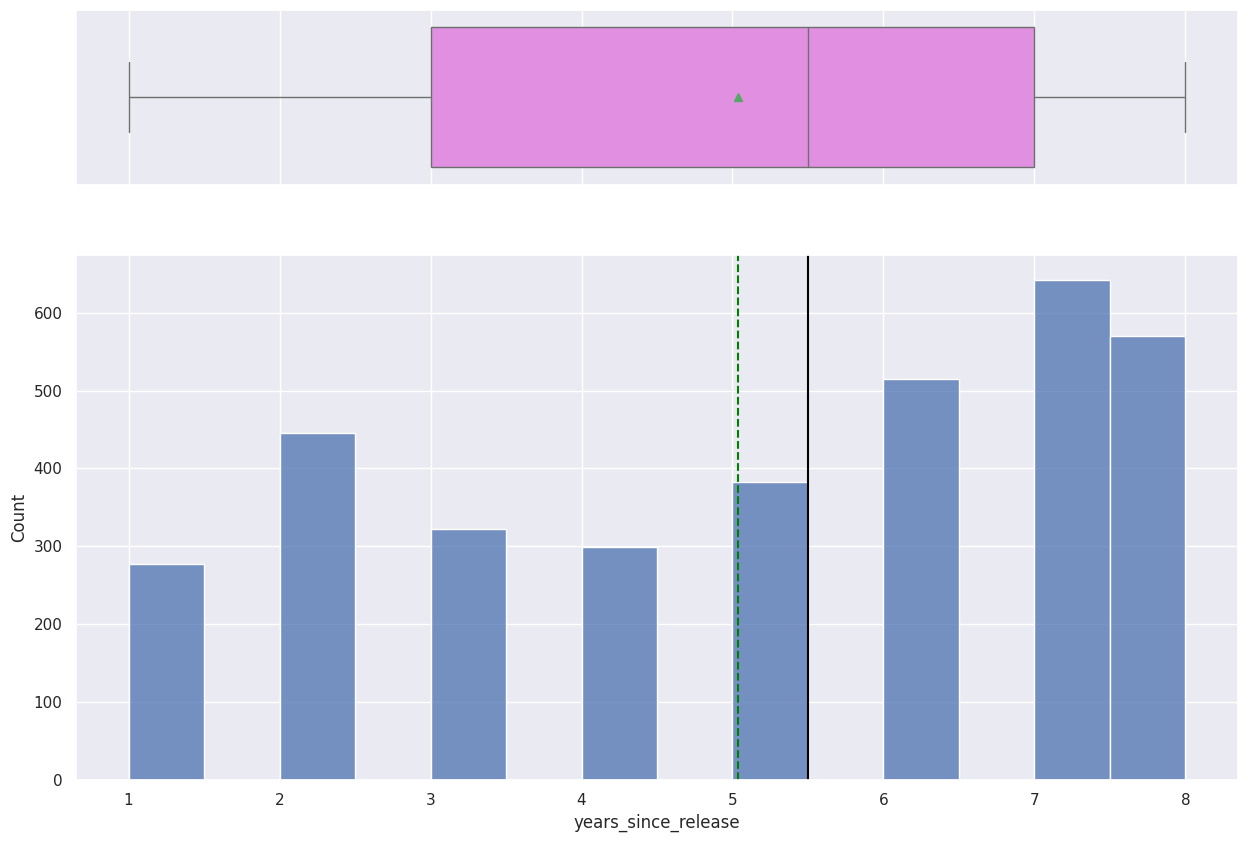

In [ ]:

histogram_boxplot(df1,"years_since_release")

### Outlier Check



- Let's check for outliers in the data.

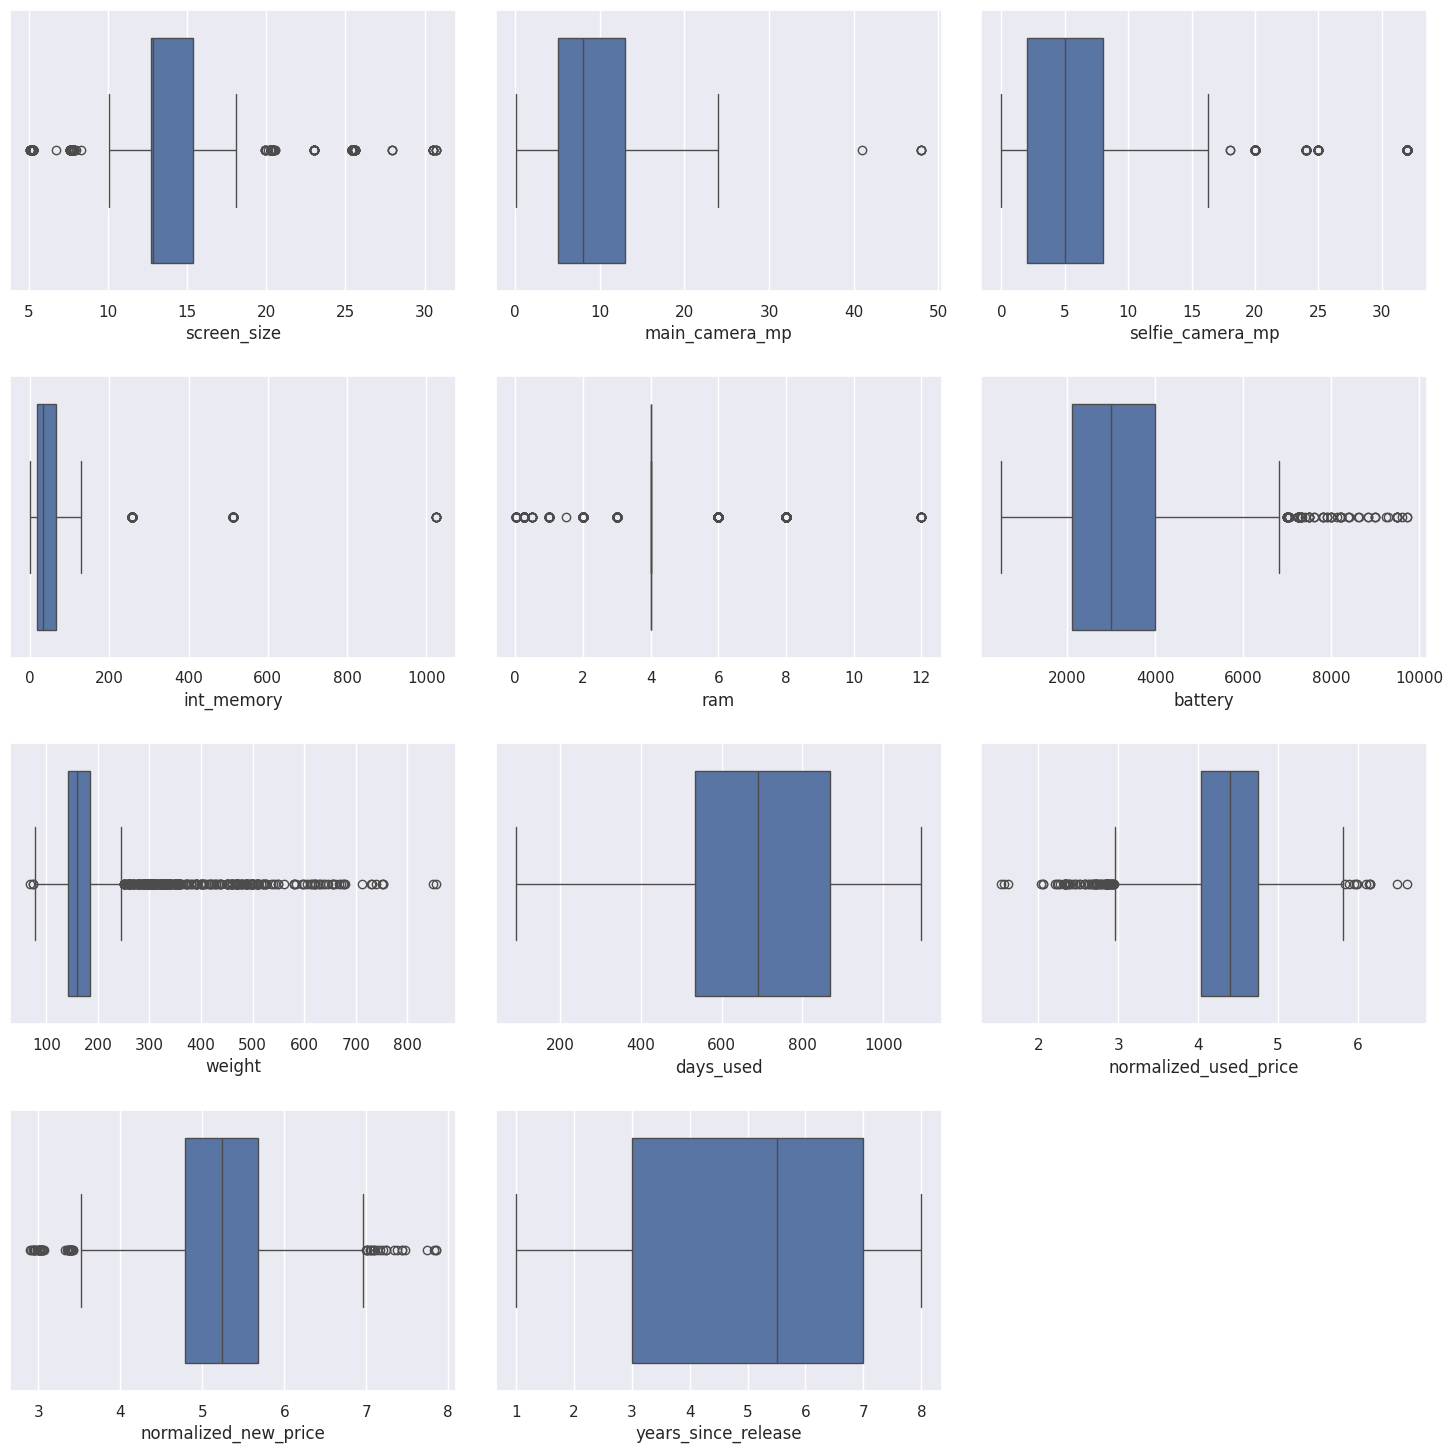

In [ ]:
# outlier detection using boxplot
num_cols = df1.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(15, 15))

for i, variable in enumerate(num_cols):
    plt.subplot(4, 3, i + 1)
    sns.boxplot(data=df1, x=variable)
    plt.tight_layout(pad=2)

plt.show()

Observations of Outliers treatment:

- There are a lot of outliers in the data.However, we will not treat them as they are proper values

### Data Preparation for modeling

- We want to predict the normalized price of used devices
- Before we proceed to build a model, we'll have to encode categorical features
- We'll split the data into train and test to be able to evaluate the model that we build on the train data
- We will build a Linear Regression model using the train data and then check it's performance

In [ ]:
## Complete the code to define the dependent and independent variables
X = df1.drop(['normalized_used_price'], axis=1)
y = df1['normalized_used_price']

print(X.head())
print()
print(y.head())

  brand_name       os  screen_size   4g   5g  main_camera_mp  \
0      Honor  Android        14.50  yes   no            13.0   
1      Honor  Android        17.30  yes  yes            13.0   
2      Honor  Android        16.69  yes  yes            13.0   
3      Honor  Android        25.50  yes  yes            13.0   
4      Honor  Android        15.32  yes   no            13.0   

   selfie_camera_mp  int_memory  ram  battery  weight  days_used  \
0               5.0        64.0  3.0   3020.0   146.0        127   
1              16.0       128.0  8.0   4300.0   213.0        325   
2               8.0       128.0  8.0   4200.0   213.0        162   
3               8.0        64.0  6.0   7250.0   480.0        345   
4               8.0        64.0  3.0   5000.0   185.0        293   

   normalized_new_price  years_since_release  
0              4.715100                    1  
1              5.519018                    1  
2              5.884631                    1  
3              5.6

In [ ]:
# let's add the intercept to data
X = sm.add_constant(X)

In [ ]:
# Creating dummy variablesX =
pd.get_dummies(
X,
    columns=X.select_dtypes(include=["object", "category"]).columns.tolist(),
    drop_first=True,)
X.head()

,const,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,days_used,normalized_new_price,years_since_release
0,1.0,Honor,Android,14.50,yes,no,13.0,5.0,64.0,3.0,3020.0,146.0,127,4.715100,1
1,1.0,Honor,Android,17.30,yes,yes,13.0,16.0,128.0,8.0,4300.0,213.0,325,5.519018,1
2,1.0,Honor,Android,16.69,yes,yes,13.0,8.0,128.0,8.0,4200.0,213.0,162,5.884631,1
3,1.0,Honor,Android,25.50,yes,yes,13.0,8.0,64.0,6.0,7250.0,480.0,345,5.630961,1
4,1.0,Honor,Android,15.32,yes,no,13.0,8.0,64.0,3.0,5000.0,185.0,293,4.947837,1


In [ ]:
# splitting the data in 70:30 ratio for train to test data

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)  ## Complete the code to split the data into train and test in specified ratio

In [ ]:
print("Number of rows in train data =", x_train.shape[0])
print("Number of rows in test data =", x_test.shape[0])

Number of rows in train data = 2417
Number of rows in test data = 1037


## Model Building - Linear Regression


In [ ]:
# Assuming 'X' and 'y' are the original DataFrame and Series
# before train_test_split

# Convert all columns in x_train and y_train to numeric if possible
x_train = x_train.apply(pd.to_numeric, errors='coerce').fillna(0)
y_train = pd.to_numeric(y_train, errors='coerce').fillna(0)

# Now fit the OLS model
olsmodel = sm.OLS(y_train, x_train).fit()
print(olsmodel.summary()) # Note: Changed olsmodel1 to olsmodel

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.840
Model:                               OLS   Adj. R-squared:                  0.840
Method:                    Least Squares   F-statistic:                     1267.
Date:                   Fri, 11 Oct 2024   Prob (F-statistic):               0.00
Time:                           02:59:03   Log-Likelihood:                 89.188
No. Observations:                   2417   AIC:                            -156.4
Df Residuals:                       2406   BIC:                            -92.68
Df Model:                             10                                         
Covariance Type:               nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
co

### Model Performance Check

**Let's check the performance of the model using different metrics.**

* We will be using metric functions defined in sklearn for RMSE, MAE, and $R^2$.
* We will define a function to calculate MAPE and adjusted $R^2$.    
* We will create a function which will print out all the above metrics in one go.

In [ ]:
# function to compute adjusted R-squared
def adj_r2_score(predictors, targets, predictions):
    r2 = r2_score(targets, predictions)
    n = predictors.shape[0]
    k = predictors.shape[1]
    return 1 - ((1 - r2) * (n - 1) / (n - k - 1))


# function to compute MAPE
def mape_score(targets, predictions):
    return np.mean(np.abs(targets - predictions) / targets) * 100


# function to compute different metrics to check performance of a regression model
def model_performance_regression(model, predictors, target):
    """
    Function to compute different metrics to check regression model performance

    model: regressor
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    r2 = r2_score(target, pred)  # to compute R-squared
    adjr2 = adj_r2_score(predictors, target, pred)  # to compute adjusted R-squared
    rmse = np.sqrt(mean_squared_error(target, pred))  # to compute RMSE
    mae = mean_absolute_error(target, pred)  # to compute MAE
    mape = mape_score(target, pred)  # to compute MAPE

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "RMSE": rmse,
            "MAE": mae,
            "R-squared": r2,
            "Adj. R-squared": adjr2,
            "MAPE": mape,
        },
        index=[0],
    )

    return df_perf

In [ ]:
# Assuming 'X' and 'y' are the original DataFrame and Series
# before train_test_split

# Convert all columns in X to numeric if possible, before splitting
X = X.apply(pd.to_numeric, errors='coerce').fillna(0)
y = pd.to_numeric(y, errors='coerce').fillna(0)

#Now perform train_test_split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

# Now fit the OLS model
olsmodel1 = sm.OLS(y_train, x_train).fit()
print(olsmodel1.summary())


# ... (rest of the code, including your model_performance_regression function) ...

# checking model performance on train set (seen 70% data)
print("Training Performance\n")
olsmodel1_train_perf = model_performance_regression(olsmodel1, x_train, y_train)
olsmodel1_train_perf

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.840
Model:                               OLS   Adj. R-squared:                  0.840
Method:                    Least Squares   F-statistic:                     1267.
Date:                   Fri, 11 Oct 2024   Prob (F-statistic):               0.00
Time:                           03:01:02   Log-Likelihood:                 89.188
No. Observations:                   2417   AIC:                            -156.4
Df Residuals:                       2406   BIC:                            -92.68
Df Model:                             10                                         
Covariance Type:               nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
co

,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.233205,0.183583,0.840372,0.839375,4.409285


In [ ]:
# checking model performance on train set (seen 70% data)
print("Training Performance\n")
olsmodel1_train_perf = model_performance_regression(olsmodel1, x_train, y_train)
olsmodel1_train_perf

Training Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.233205,0.183583,0.840372,0.839375,4.409285


In [ ]:
# checking model performance on test set (seen 30% data)
print("Test Performance\n")
olsmodel1_test_perf = model_performance_regression(olsmodel1, x_test, y_test) # Changed x_test1 to x_test
olsmodel1_test_perf

Test Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.237467,0.18389,0.843654,0.841357,4.491875


## Checking Linear Regression Assumptions

We will be checking the following Linear Regression assumptions:

1. **No Multicollinearity**

2. **Linearity of variables**

3. **Independence of error terms**

4. **Normality of error terms**

5. **No Heteroscedasticity**

### TEST FOR MULTICOLLINEARITY



- We will test for multicollinearity using VIF.

- **General Rule of thumb**:
    - If VIF is 1 then there is no correlation between the $k$th predictor and the remaining predictor variables.
    - If VIF exceeds 5 or is close to exceeding 5, we say there is moderate multicollinearity.
    - If VIF is 10 or exceeding 10, it shows signs of high multicollinearity.

Let's define a function to check VIF.

In [ ]:
#Let's define a function to check VIF.

def checking_vif(predictors):
    vif = pd.DataFrame()
    vif["feature"] = predictors.columns

    # calculating VIF for each feature
    vif["VIF"] = [
        variance_inflation_factor(predictors.values, i)
        for i in range(len(predictors.columns))
    ]
    return vif

In [ ]:
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor
# Import add_constant
from statsmodels.tools.tools import add_constant

def checking_vif(predictors):
    # Convert all columns in 'predictors' to numeric,
    # errors='coerce' will replace non-numeric values with NaN
    numeric_predictors = predictors.apply(pd.to_numeric, errors='coerce')

    # Drop columns with all NaN values (if any)
    numeric_predictors = numeric_predictors.dropna(axis=1, how='all')

    # Add a constant column to the DataFrame
    numeric_predictors = add_constant(numeric_predictors)

    vif = pd.DataFrame()
    vif["feature"] = numeric_predictors.columns

    # calculating VIF for each feature
    vif["VIF"] = [
        variance_inflation_factor(numeric_predictors.values, i)
        for i in range(len(numeric_predictors.columns))
    ]
    return vif

In [ ]:
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

def checking_vif(predictors):
    # Select only numeric columns
    numeric_predictors = predictors.select_dtypes(include=['number'])

    # Add a constant column to the DataFrame
    numeric_predictors = add_constant(numeric_predictors)

    vif = pd.DataFrame()
    vif["feature"] = numeric_predictors.columns

    # calculating VIF for each feature
    vif["VIF"] = [
        variance_inflation_factor(numeric_predictors.values, i)
        for i in range(len(numeric_predictors.columns))
    ]
    return vif

In [ ]:
checking_vif(x_train) ## Complete the code to check VIF on train data

/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1782: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


,feature,VIF
0,const,98.993556
1,brand_name,NaN
2,os,NaN
3,screen_size,6.097696
4,4g,NaN
5,5g,NaN
6,main_camera_mp,1.838534
7,selfie_camera_mp,2.538478
8,int_memory,1.204239
9,ram,1.569363


### Removing Multicollinearity (if needed)



To remove multicollinearity

1. Drop every column one by one that has a VIF score greater than 5.
2. Look at the adjusted R-squared and RMSE of all these models.
3. Drop the variable that makes the least change in adjusted R-squared.
4. Check the VIF scores again.
5. Continue till you get all VIF scores under 5.

Let's define a function that will help us do this.

In [ ]:
def treating_multicollinearity(predictors, target, high_vif_columns):
    """
    Checking the effect of dropping the columns showing high multicollinearity
    on model performance (adj. R-squared and RMSE)

    predictors: independent variables
    target: dependent variable
    high_vif_columns: columns having high VIF
    """
    # empty lists to store adj. R-squared and RMSE values
    adj_r2 = []
    rmse = []

    # build ols models by dropping one of the high VIF columns at a time
    # store the adjusted R-squared and RMSE in the lists defined previously
    for cols in high_vif_columns:
        # defining the new train set
        train = predictors.loc[:, ~predictors.columns.str.startswith(cols)]

        # create the model
        olsmodel = sm.OLS(target, train).fit()

        # adding adj. R-squared and RMSE to the lists
        adj_r2.append(olsmodel.rsquared_adj)
        rmse.append(np.sqrt(olsmodel.mse_resid))

    # creating a dataframe for the results
    temp = pd.DataFrame(
        {
            "col": high_vif_columns,
            "Adj. R-squared after_dropping col": adj_r2,
            "RMSE after dropping col": rmse,
        }
    ).sort_values(by="Adj. R-squared after_dropping col", ascending=False)
    temp.reset_index(drop=True, inplace=True)

    return temp

In [ ]:
import pandas as pd
import numpy as np
import statsmodels.api as sm


def treating_multicollinearity(predictors, target, high_vif_columns):
    """
    Checking the effect of dropping the columns showing high multicollinearity
    on model performance (adj. R-squared and RMSE)

    predictors: independent variables
    target: dependent variable
    high_vif_columns: columns having high VIF
    """
    # empty lists to store adj. R-squared and RMSE values
    adj_r2 = []
    rmse = []

    # build ols models by dropping one of the high VIF columns at a time
    # store the adjusted R-squared and RMSE in the lists defined previously
    for cols in high_vif_columns:
        # defining the new train set
        # Exclude columns starting with 'cols' and select only numeric dtypes
        train = predictors.loc[:, ~predictors.columns.str.startswith(cols)].select_dtypes(include=np.number)

        # create the model
        olsmodel = sm.OLS(target, train).fit()

        # adding adj. R-squared and RMSE to the lists
        adj_r2.append(olsmodel.rsquared_adj)
        rmse.append(np.sqrt(olsmodel.mse_resid))

    # creating a dataframe for the results
    temp = pd.DataFrame(
        {
            "col": high_vif_columns,
            "Adj. R-squared after_dropping col": adj_r2,
            "RMSE after dropping col": rmse,
        }
    ).sort_values(by="Adj. R-squared after_dropping col", ascending=False)
    temp.reset_index(drop=True, inplace=True)

    return temp

In [ ]:
col_list = [feature  for feature,vif in checking_vif(x_train1.select_dtypes(exclude=['uint8','object','category'])).values if vif >=5] ## Complete the code to specify the columns with high VIF
print(col_list)
res = treating_multicollinearity(x_train1, y_train, col_list) ## Complete the code to check the effect on model performance after dropping specified columns from train data
res

['const', 'screen_size', 'weight']


,col,Adj. R-squared after_dropping col,RMSE after dropping col
0,const,0.996236,0.270348
1,weight,0.836964,0.235730
2,screen_size,0.834146,0.237759


In [ ]:
col_to_drop = 'Screen Size' ## Complete the code to specify the column to drop
x_train2 = x_train1.loc[:, ~x_train1.columns.str.startswith(col_to_drop)] ## Complete the code to specify the train data from which to drop the column specified
x_test2 = x_test1.loc[:, ~x_test1.columns.str.startswith(col_to_drop)] ## Complete the code to specify the test data from which to drop the column specified

# Check VIF now
vif = checking_vif(x_train2.select_dtypes(exclude=['uint8','object','category']))
print("VIF after dropping ", col_to_drop)
vif

VIF after dropping  Screen Size


,feature,VIF
0,const,98.993556
1,screen_size,6.097696
2,main_camera_mp,1.838534
3,selfie_camera_mp,2.538478
4,int_memory,1.204239
5,ram,1.569363
6,battery,3.758687
7,weight,5.518991
8,days_used,2.486067
9,normalized_new_price,2.321351


### Dropping high p-value variables (if needed)

- We will drop the predictor variables having a p-value greater than 0.05 as they do not significantly impact the target variable.
- But sometimes p-values change after dropping a variable. So, we'll not drop all variables at once.
- Instead, we will do the following:
    - Build a model, check the p-values of the variables, and drop the column with the highest p-value.
    - Create a new model without the dropped feature, check the p-values of the variables, and drop the column with the highest p-value.
    - Repeat the above two steps till there are no columns with p-value > 0.05.

The above process can also be done manually by picking one variable at a time that has a high p-value, dropping it, and building a model again. But that might be a little tedious and using a loop will be more efficient.

In [ ]:
# initial list of columns
cols = x_train2.select_dtypes(include=np.number).columns.tolist()   ## Changed to select only numeric columns initially

# setting an initial max p-value
max_p_value = 1

while len(cols) > 0:
    # defining the train set
    x_train_aux = x_train2[cols]   ## Complete the code to check for p-values on the right dataset

    # fitting the model
    model = sm.OLS(y_train, x_train_aux).fit()

    # getting the p-values and the maximum p-value
    p_values = model.pvalues
    max_p_value = max(p_values)

    # name of the variable with maximum p-value
    feature_with_p_max = p_values.idxmax()

    if max_p_value > 0.05:
        cols.remove(feature_with_p_max)
    else:
        break

selected_features = cols
print(selected_features)

['const', 'screen_size', 'main_camera_mp', 'selfie_camera_mp', 'ram', 'weight', 'days_used', 'normalized_new_price', 'years_since_release']


In [ ]:
x_train3 = x_train2[selected_features]  ## Complete the code to specify the train data from which to select the specified columns
x_test3 = x_test2[selected_features]  ## Complete the code to specify the test data from which to select the specified columns

In [ ]:
olsmodel2 = sm.OLS(y_train,x_train3).fit() ## Complete the code fit OLS() on updated dataset (no multicollinearity and no insignificant predictors)
print(olsmodel2.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.840
Model:                               OLS   Adj. R-squared:                  0.840
Method:                    Least Squares   F-statistic:                     1582.
Date:                   Fri, 11 Oct 2024   Prob (F-statistic):               0.00
Time:                           03:12:31   Log-Likelihood:                 87.706
No. Observations:                   2417   AIC:                            -157.4
Df Residuals:                       2408   BIC:                            -105.3
Df Model:                              8                                         
Covariance Type:               nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
co

In [ ]:
# checking model performance on train set (seen 70% data)
print("Training Performance\n")
olsmodel2_train_perf = model_performance_regression(olsmodel2,x_train3,y_train) ## Complete the code to check performance on train data
olsmodel2_train_perf

Training Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.233348,0.18355,0.840176,0.839579,4.407851


In [ ]:
# checking model performance on test set (seen 30% data)
print("Test Performance\n")
olsmodel2_test_perf = model_performance_regression(olsmodel2, x_test3, y_test) ## Complete the code to check performance on test data
olsmodel2_test_perf

Test Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.23732,0.183571,0.843847,0.842479,4.480411


**Now we'll check the rest of the assumptions on *olsmod2*.**

2. **Linearity of variables**

3. **Independence of error terms**

4. **Normality of error terms**

5. **No Heteroscedasticity**

### TEST FOR LINEARITY AND INDEPENDENCE



- We will test for linearity and independence by making a plot of fitted values vs residuals and checking for patterns.
- If there is no pattern, then we say the model is linear and residuals are independent.
- Otherwise, the model is showing signs of non-linearity and residuals are not independent.

In [ ]:
# let us create a dataframe with actual, fitted and residual values
df_pred = pd.DataFrame()

df_pred["Actual Values"] = y_train  # actual values
df_pred["Fitted Values"] = olsmodel2.fittedvalues  # predicted values
df_pred["Residuals"] = olsmodel2.resid  # residuals

df_pred.head()

,Actual Values,Fitted Values,Residuals
3026,4.087488,3.872593,0.214895
1525,4.448399,4.575017,-0.126617
1128,4.315353,4.312118,0.003234
3003,4.282068,4.204958,0.077110
2907,4.456438,4.460473,-0.004035


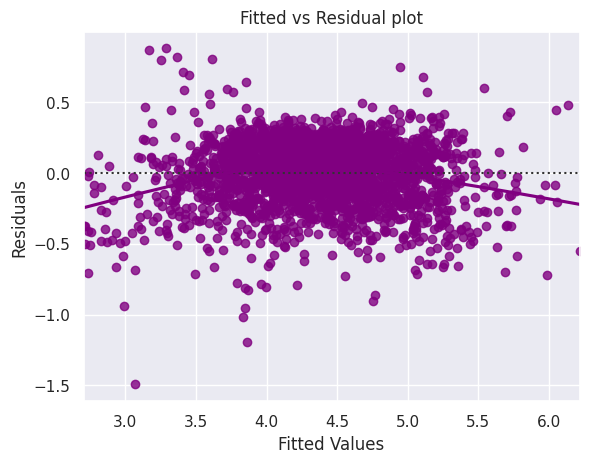

In [ ]:
# let's plot the fitted values vs residuals

sns.residplot(
    data=df_pred, x="Fitted Values", y="Residuals", color="purple", lowess=True
)
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Fitted vs Residual plot")
plt.show()

### TEST FOR NORMALITY

- We will test for normality by checking the distribution of residuals, by checking the Q-Q plot of residuals, and by using the Shapiro-Wilk test.
- If the residuals follow a normal distribution, they will make a straight line plot, otherwise not.
- If the p-value of the Shapiro-Wilk test is greater than 0.05, we can say the residuals are normally distributed.

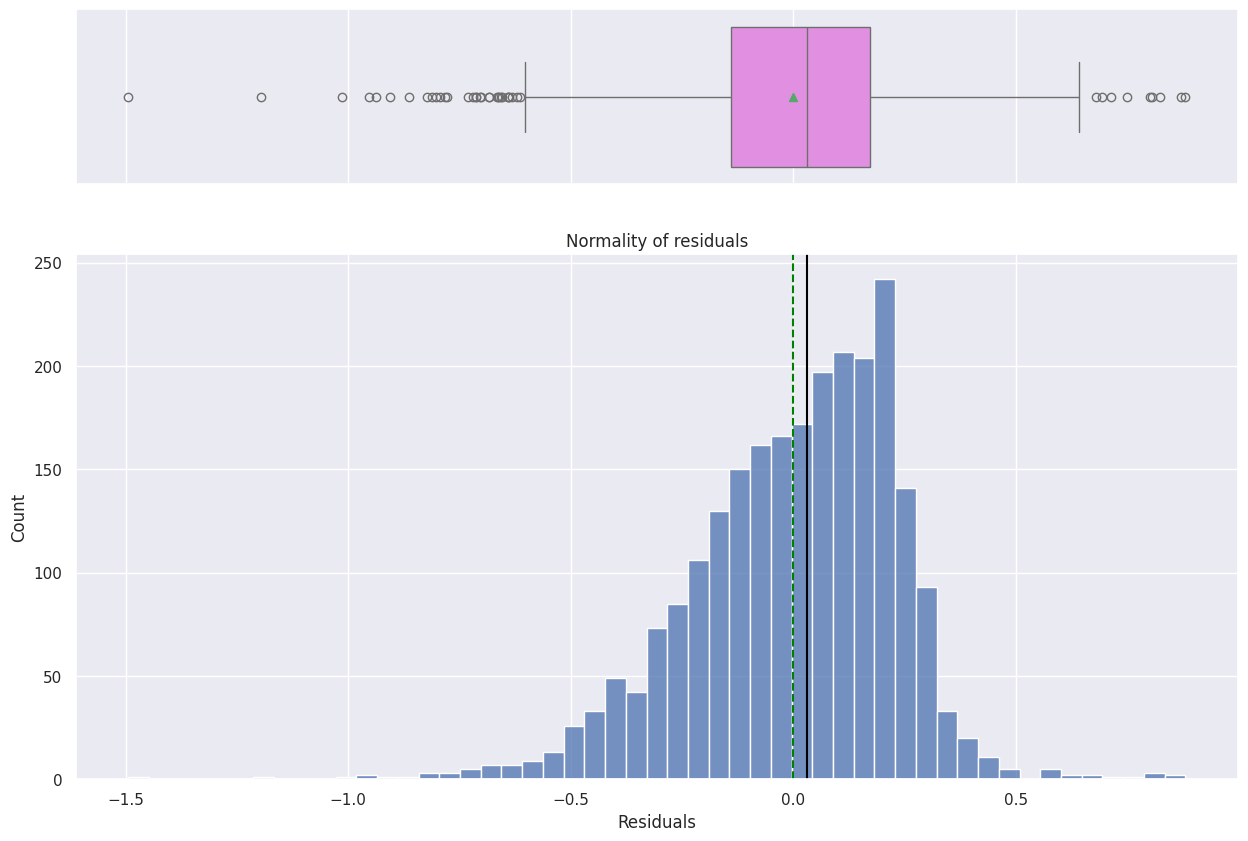

In [ ]:
histogram_boxplot(df_pred,'Residuals') ## Complete the code to plot the distribution of residuals
plt.title("Normality of residuals")
plt.show()

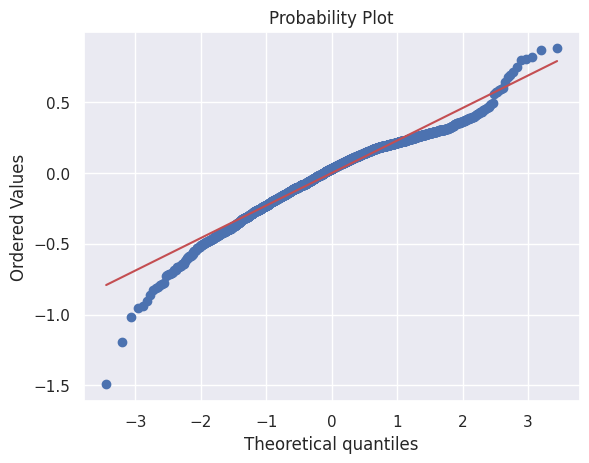

In [ ]:
import pylab
import scipy.stats as stats

stats.probplot(df_pred['Residuals'], dist="norm", plot=pylab) ## Complete the code check Q-Q plot
plt.show()

In [ ]:
stats.shapiro(df_pred['Residuals'].values) ## Complete the code to apply the Shapiro-Wilks test

ShapiroResult(statistic=0.9678086423937371, pvalue=7.634328509630319e-23)

### TEST FOR HOMOSCEDASTICITY



- We will test for homoscedasticity by using the goldfeldquandt test.
- If we get a p-value greater than 0.05, we can say that the residuals are homoscedastic. Otherwise, they are heteroscedastic.

In [ ]:
import statsmodels.stats.api as sms
from statsmodels.compat import lzip

name = ["F statistic", "p-value"]
test = sms.het_goldfeldquandt(df_pred['Residuals'].values,olsmodel2.model.exog) ## Complete the code to apply the Goldfeldquandt test
lzip(name, test)

[('F statistic', 1.0595652195489762), ('p-value', 0.15825251352781292)]

## Final Model Summary

In [ ]:
olsmodel_final = sm.OLS(y_train,x_train3).fit() ## Complete the code to fit the final model
print(olsmodel_final.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.840
Model:                               OLS   Adj. R-squared:                  0.840
Method:                    Least Squares   F-statistic:                     1582.
Date:                   Fri, 11 Oct 2024   Prob (F-statistic):               0.00
Time:                           03:16:06   Log-Likelihood:                 87.706
No. Observations:                   2417   AIC:                            -157.4
Df Residuals:                       2408   BIC:                            -105.3
Df Model:                              8                                         
Covariance Type:               nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
co

In [ ]:
# checking model performance on train set (seen 70% data)
print("Training Performance\n")
olsmodel_final_train_perf = model_performance_regression(olsmodel_final,x_train3,y_train) ## Complete the code to check the performance on train data
olsmodel_final_train_perf

Training Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.233348,0.18355,0.840176,0.839579,4.407851


In [ ]:
# checking model performance on test set (seen 30% data)
print("Test Performance\n")
olsmodel_final_test_perf = model_performance_regression(olsmodel_final,x_test3,y_test) ## Complete the code to check performance on test data
olsmodel_final_test_perf

Test Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.23732,0.183571,0.843847,0.842479,4.480411


In [ ]:
df_olsmodel_final = pd.read_html(olsmodel_final.summary().tables[1].as_html(),header=0,index_col=0)[0]

<ipython-input-392-528fe26349b5>:1: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df_olsmodel_final = pd.read_html(olsmodel_final.summary().tables[1].as_html(),header=0,index_col=0)[0]


In [ ]:
df_olsmodel_final.sort_values(by='coef',ascending=False)

,coef,std err,t,P>|t|,[0.025,0.975]
const,1.345300,0.04700,28.475,0.000,1.253000,1.438
normalized_new_price,0.427500,0.01000,41.091,0.000,0.407000,0.448
screen_size,0.026800,0.00300,9.075,0.000,0.021000,0.033
main_camera_mp,0.022100,0.00100,16.676,0.000,0.020000,0.025
ram,0.017500,0.00400,4.073,0.000,0.009000,0.026
selfie_camera_mp,0.013900,0.00100,13.097,0.000,0.012000,0.016
weight,0.000700,0.00000,6.357,0.000,0.001000,0.001
days_used,0.000068,0.00003,2.273,0.023,0.000009,0.000
years_since_release,-0.027900,0.00400,-7.157,0.000,-0.036000,-0.020


<Axes: >

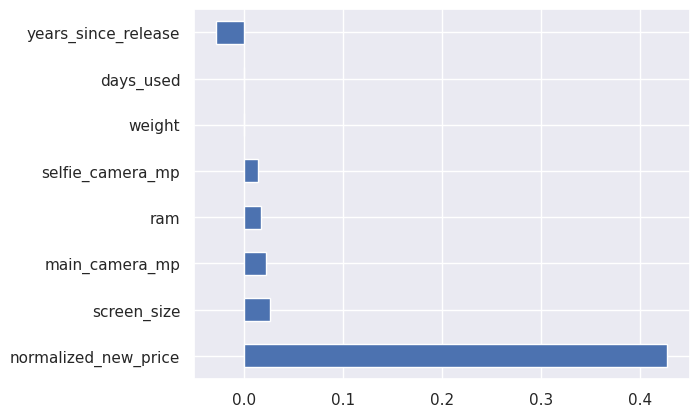

In [ ]:
df_olsmodel_final['coef'][1:].sort_values(ascending=False).plot.barh()

##  Actionable Insights and Recommendations



*   Significant factors influencing used phone prices include selfie_camera, screen_size, and int_memory, with higher values leading to increased prices. New_price also has a strong positive correlation the used price.
*   Expensive brands tend to have more refurbished phones with larger screens and better selfie cameras, while cheaper brands have fewer such phones. Features like 5G contribute positively to prices, while factors like weight, battery size, RAM, and Android OS are insignificant for prediction.
*   ReCell should focus on phones with better selfie cameras, bigger screens, and more storage, as these drive up used phone prices and appeal to buyers.

*   ReCell should also Invest in high-end brands with better features, and not focus  on lower-end models that don’t add as much value to the resale price.


*   In the future it would be beneficial to gather more data on ReCell’s customers. This could include characteristics such as age, sex, income, etc. Moreover, ReCell should collect data on the refurbishment cost to identify which models are most cost-effective to refurbish and resell.






